# Lag, ACF and PACF  hands on

## importing required libraries

In [9]:
import os
import pandas                          as      pd
import numpy                           as      np
import matplotlib.pyplot               as      plt
from statsmodels.tsa.stattools         import  adfuller
from statsmodels.tsa.stattools         import  pacf
from statsmodels.tsa.stattools         import  acf
from statsmodels.graphics.tsaplots     import  plot_pacf
from statsmodels.graphics.tsaplots     import  plot_acf
from   IPython.display                 import  display
from   pylab                           import  rcParams 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Lag Plot

In [10]:
LOCAL_DATA_PATH = os.path.join(os.path.abspath('./../../'), 'data/TS_data/')
LOCAL_DATA_PATH

'/Users/vidyadharbendre/nn_workspace/learn_neural_network_using_examples/data/TS_data/'

In [13]:
df = pd.read_excel(LOCAL_DATA_PATH+'StockPrice.xlsx')

In [14]:
#!pip install openpyxl

In [15]:
df.head()

,Year,Month,Price
0,1981,Jan,67.267076
1,1981,Feb,65.864130
2,1981,Mar,70.804041
3,1981,Apr,72.375145
4,1981,May,70.605226


In [16]:
df.tail()

,Year,Month,Price
151,1993,Aug,255.422727
152,1993,Sep,252.513636
153,1993,Oct,267.576190
154,1993,Nov,270.847619
155,1993,Dec,286.342857


In [17]:
date=pd.date_range(start="01/01/1981",end="31/12/1993",freq='M')
date

DatetimeIndex(['1981-01-31', '1981-02-28', '1981-03-31', '1981-04-30',
               '1981-05-31', '1981-06-30', '1981-07-31', '1981-08-31',
               '1981-09-30', '1981-10-31',
               ...
               '1993-03-31', '1993-04-30', '1993-05-31', '1993-06-30',
               '1993-07-31', '1993-08-31', '1993-09-30', '1993-10-31',
               '1993-11-30', '1993-12-31'],
              dtype='datetime64[ns]', length=156, freq='ME')

In [18]:
df['Month']=date
df=df.drop('Year',axis=1)
df=df.set_index('Month')

<Axes: xlabel='Month'>

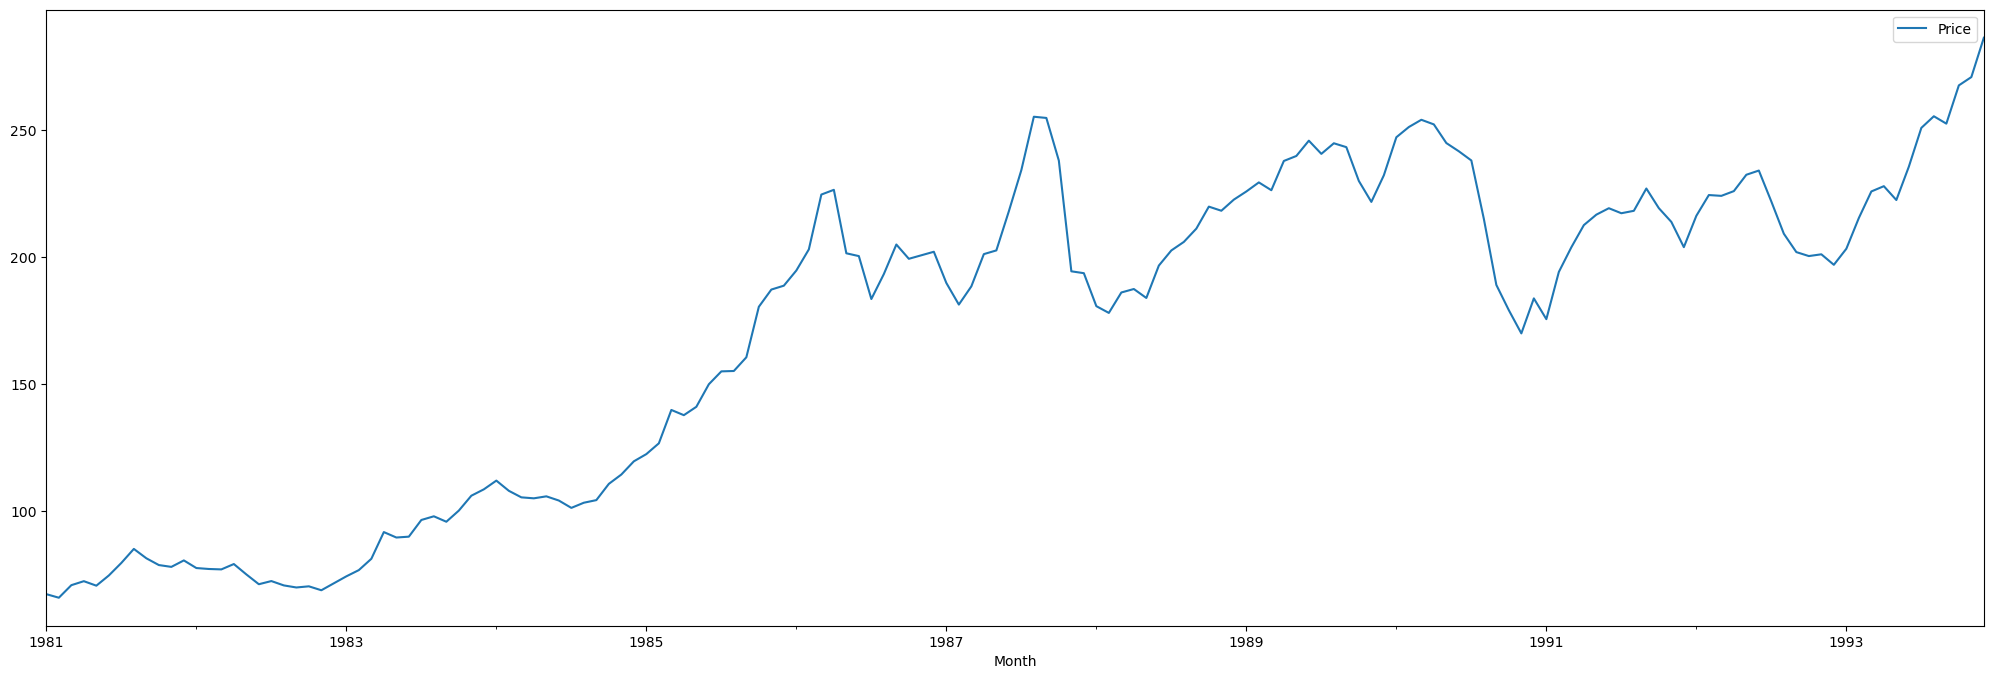

In [19]:
rcParams['figure.figsize'] = 25,8
df.plot()

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

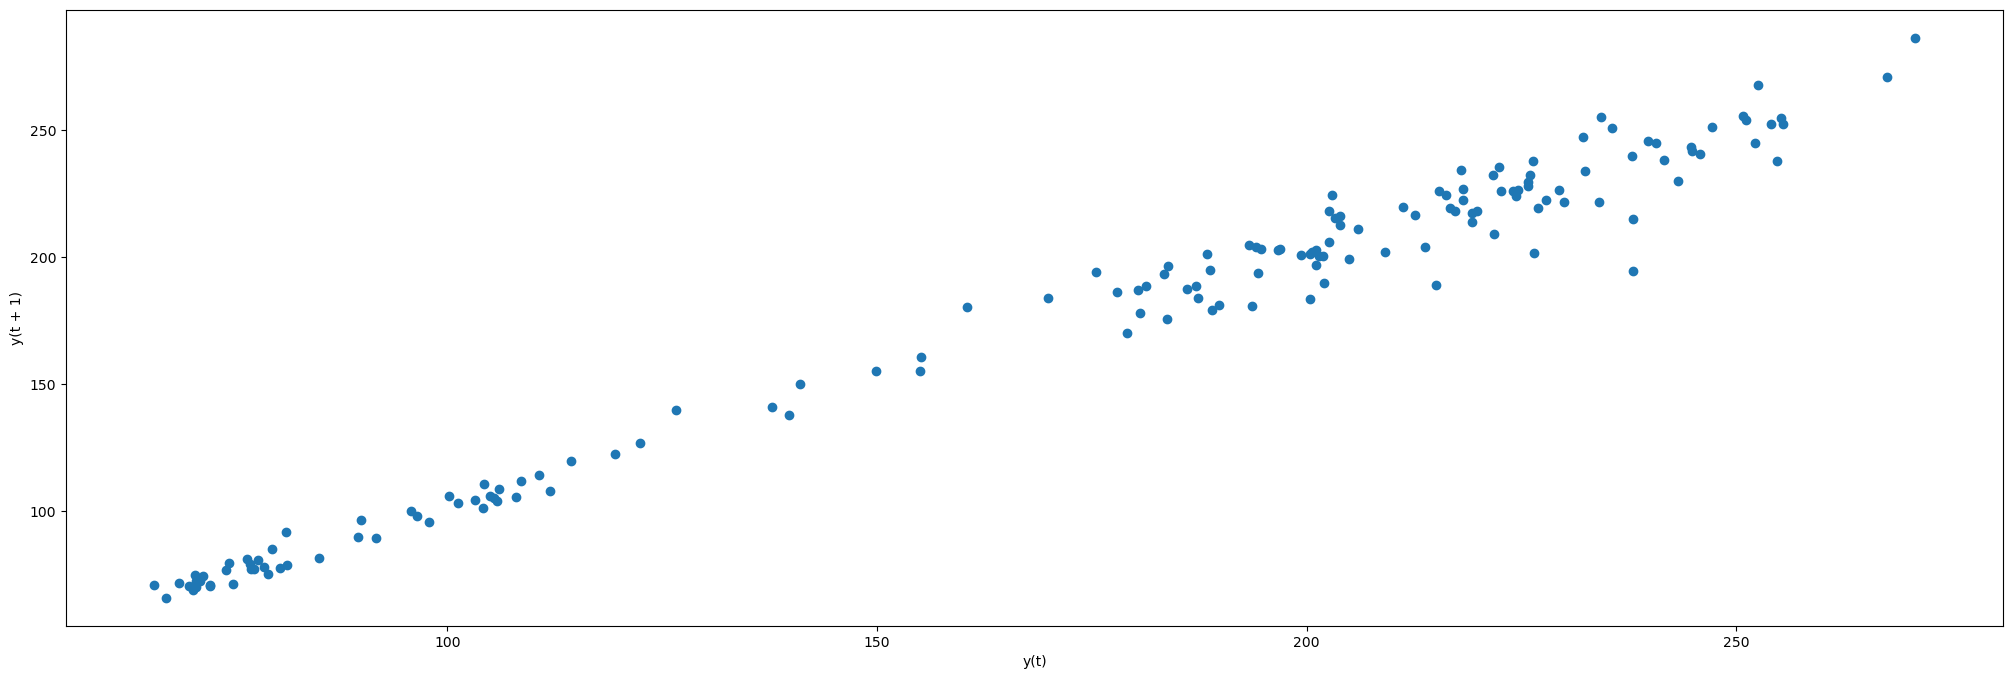

In [20]:
pd.plotting.lag_plot(df, lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 2)'>

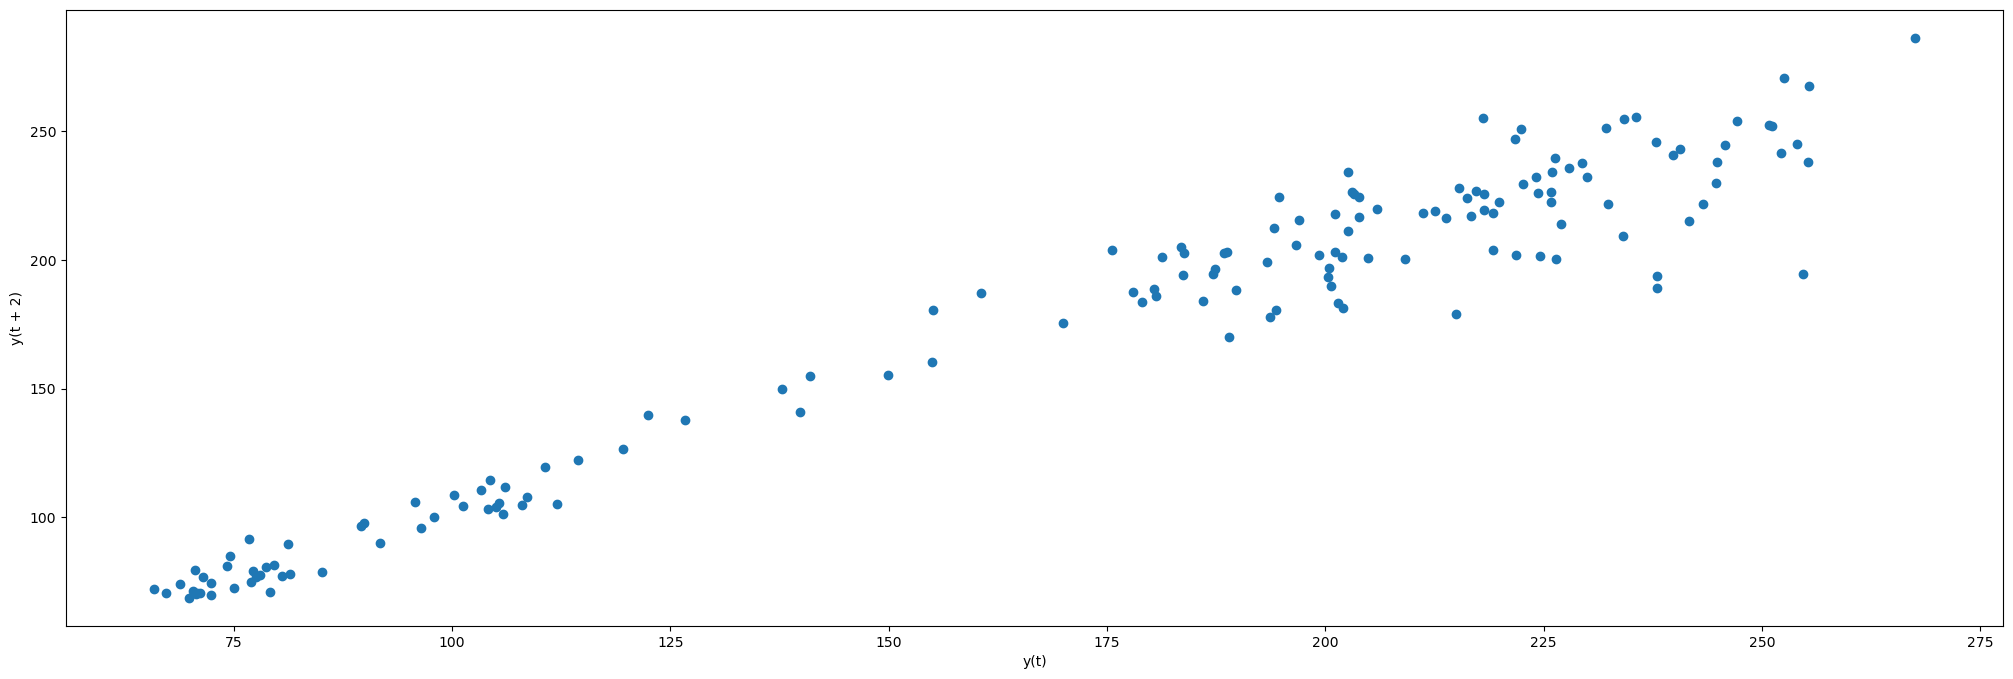

In [21]:
pd.plotting.lag_plot(df, lag=2)

<Axes: xlabel='y(t)', ylabel='y(t + 3)'>

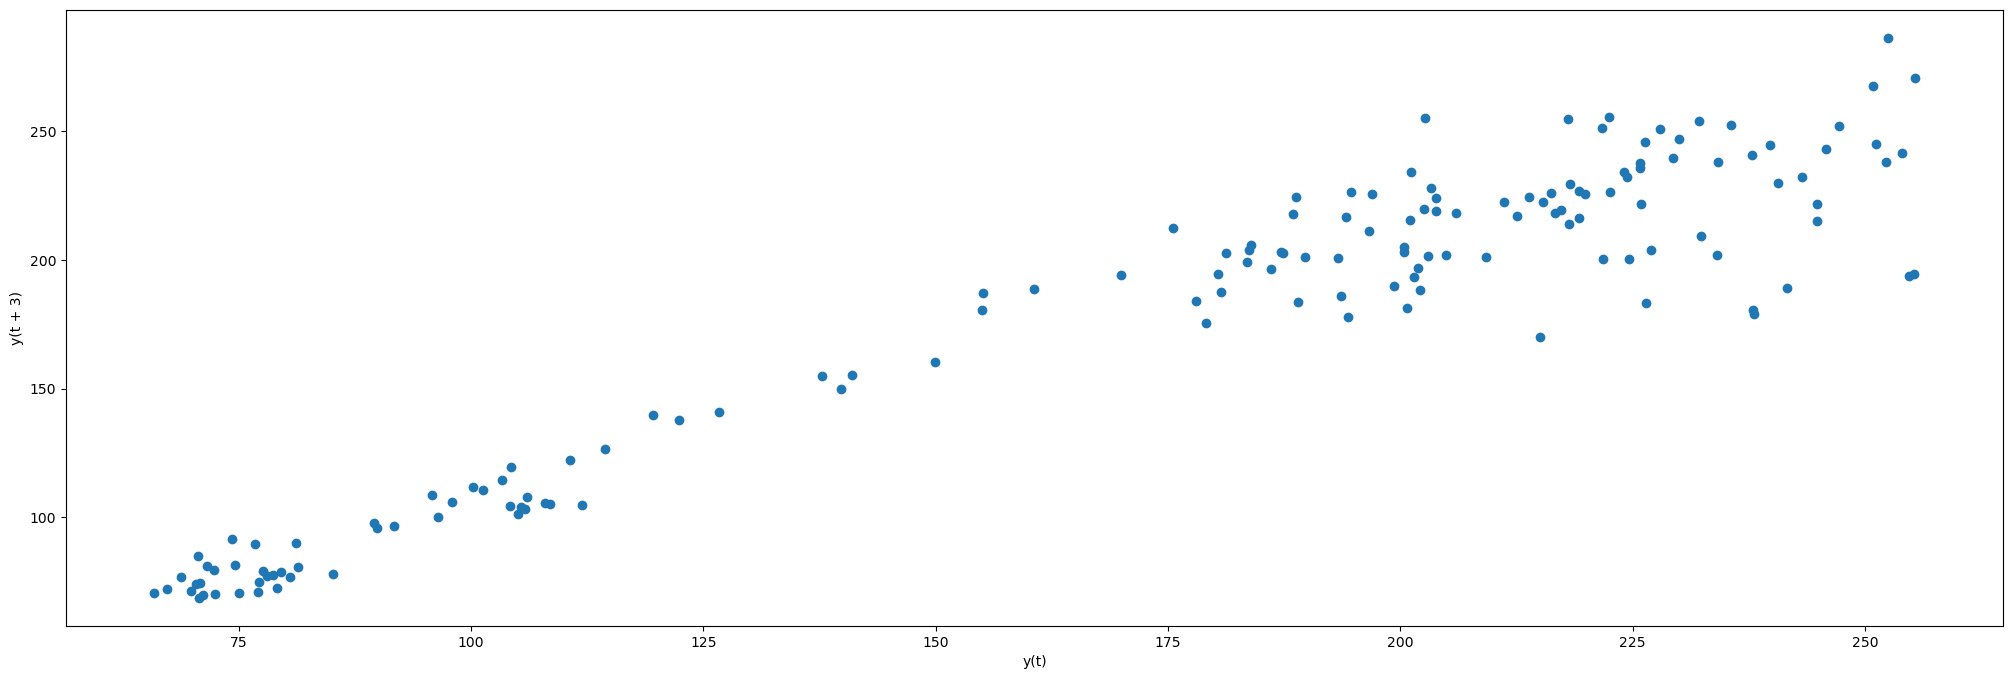

In [22]:
pd.plotting.lag_plot(df, lag=3)

## ACF anf PACF

### ACF-PACF plot for random process with mean 0 and Std Dev 1

<Axes: >

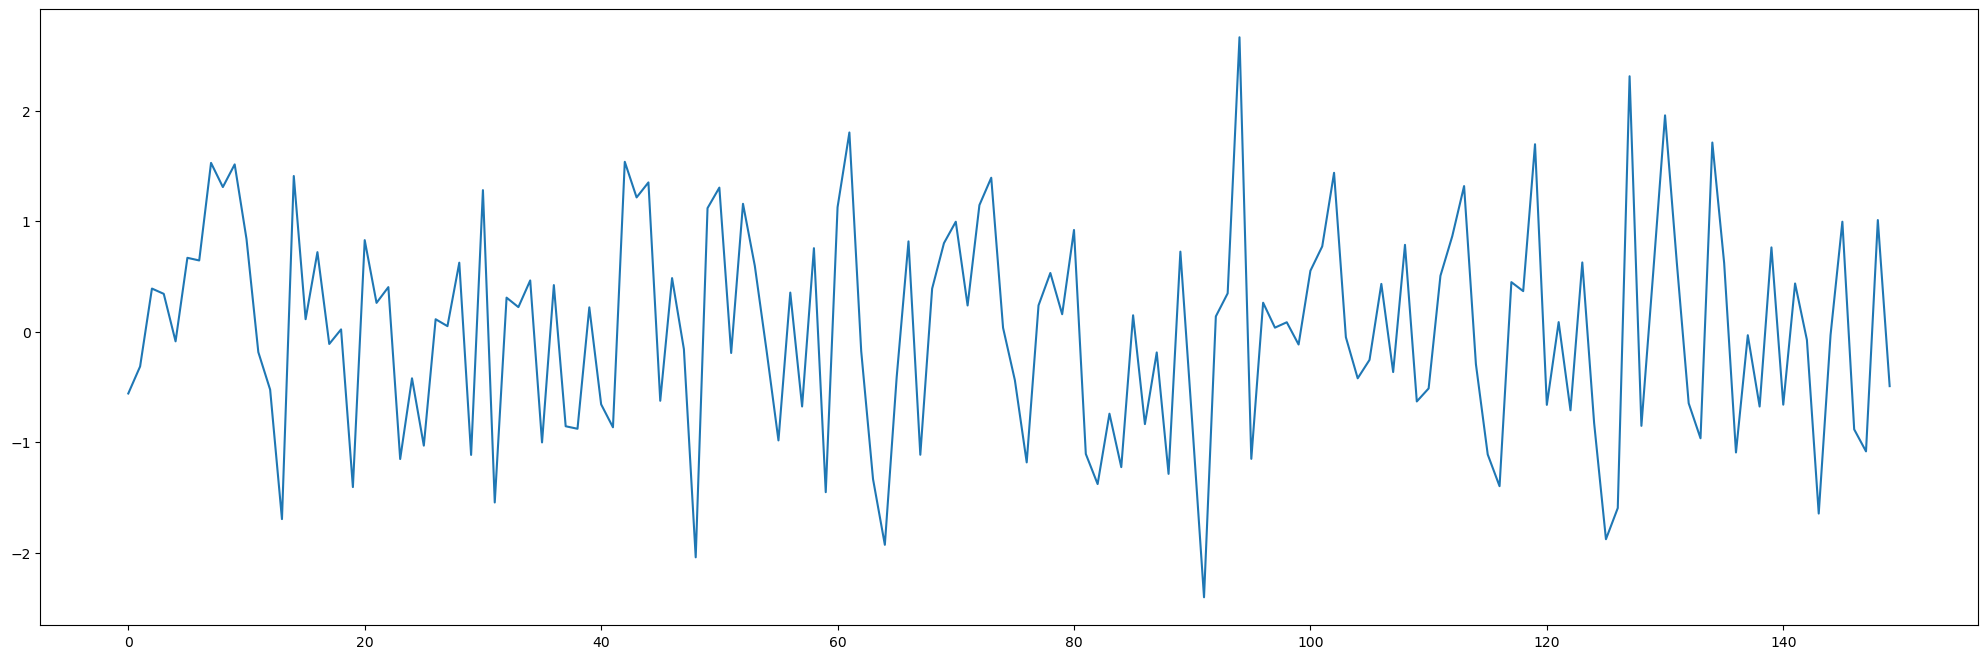

In [23]:
array = np.random.normal(0,1,150) 
array=pd.Series(array)
array.plot()

In [24]:
acf(array)

array([ 1.        ,  0.02398145, -0.04149943, -0.12217254,  0.03698491,
       -0.1032818 , -0.00108765,  0.05578724,  0.08683757, -0.08498837,
        0.03382294, -0.01621423,  0.02071423, -0.19669816, -0.03764659,
       -0.14928172,  0.02866115,  0.02211347,  0.00400982,  0.06764845,
       -0.10622549, -0.04636001])

In [25]:
pacf(array)

array([ 1.        ,  0.0241424 , -0.04266795, -0.12287217,  0.04252734,
       -0.12108303, -0.0072866 ,  0.06061565,  0.05951488, -0.08401922,
        0.05348243, -0.0155432 ,  0.01199189, -0.19217546, -0.05766687,
       -0.19434633, -0.01470851,  0.01519084, -0.09386559,  0.10000342,
       -0.16536968, -0.00763333])

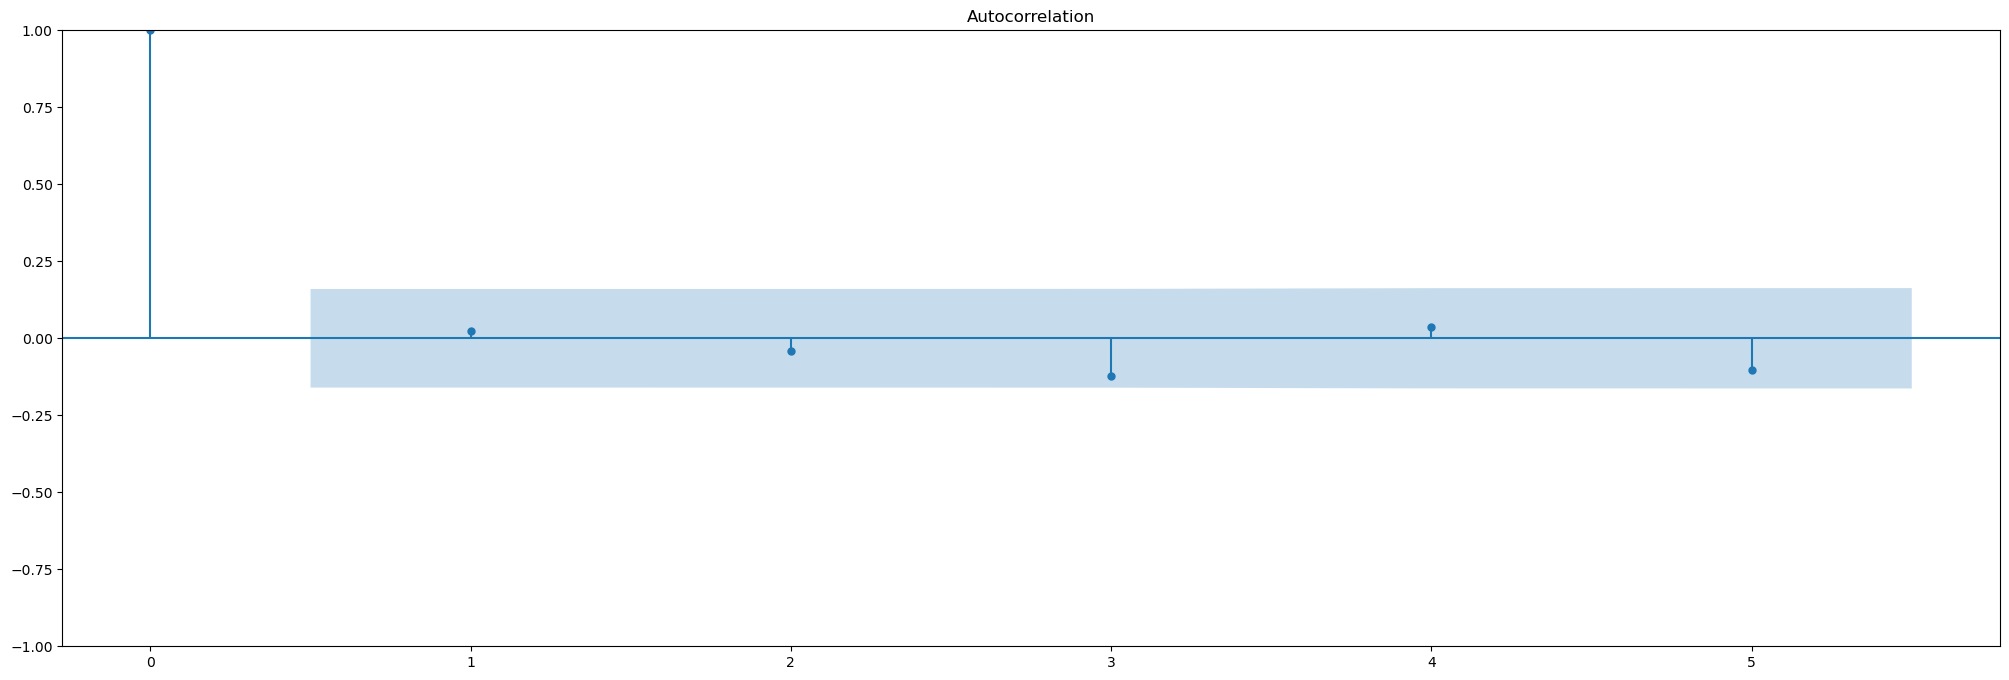

In [26]:
plot_acf(array,lags=5);

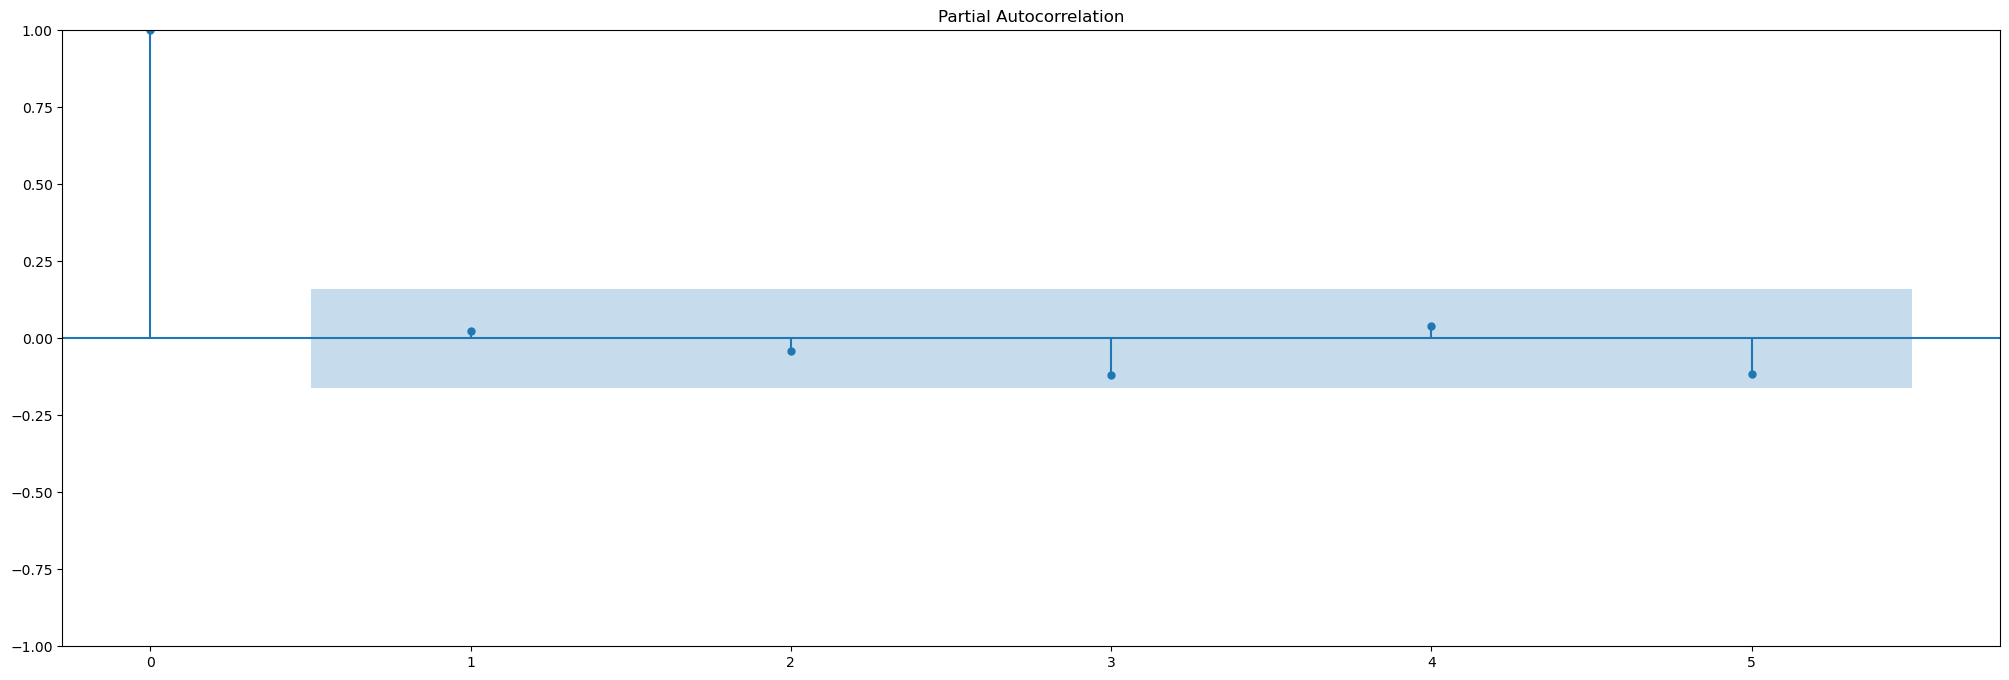

In [27]:
plot_pacf(array,lags=5);

### ACF-PACF plot for series with trend

In [29]:
df1= pd.read_csv(LOCAL_DATA_PATH+'GDPUS.csv')
df1.head()

,Year,GDP
0,1929,821.8
1,1930,748.9
2,1931,691.3
3,1932,599.7
4,1933,587.1


<Axes: xlabel='Year'>

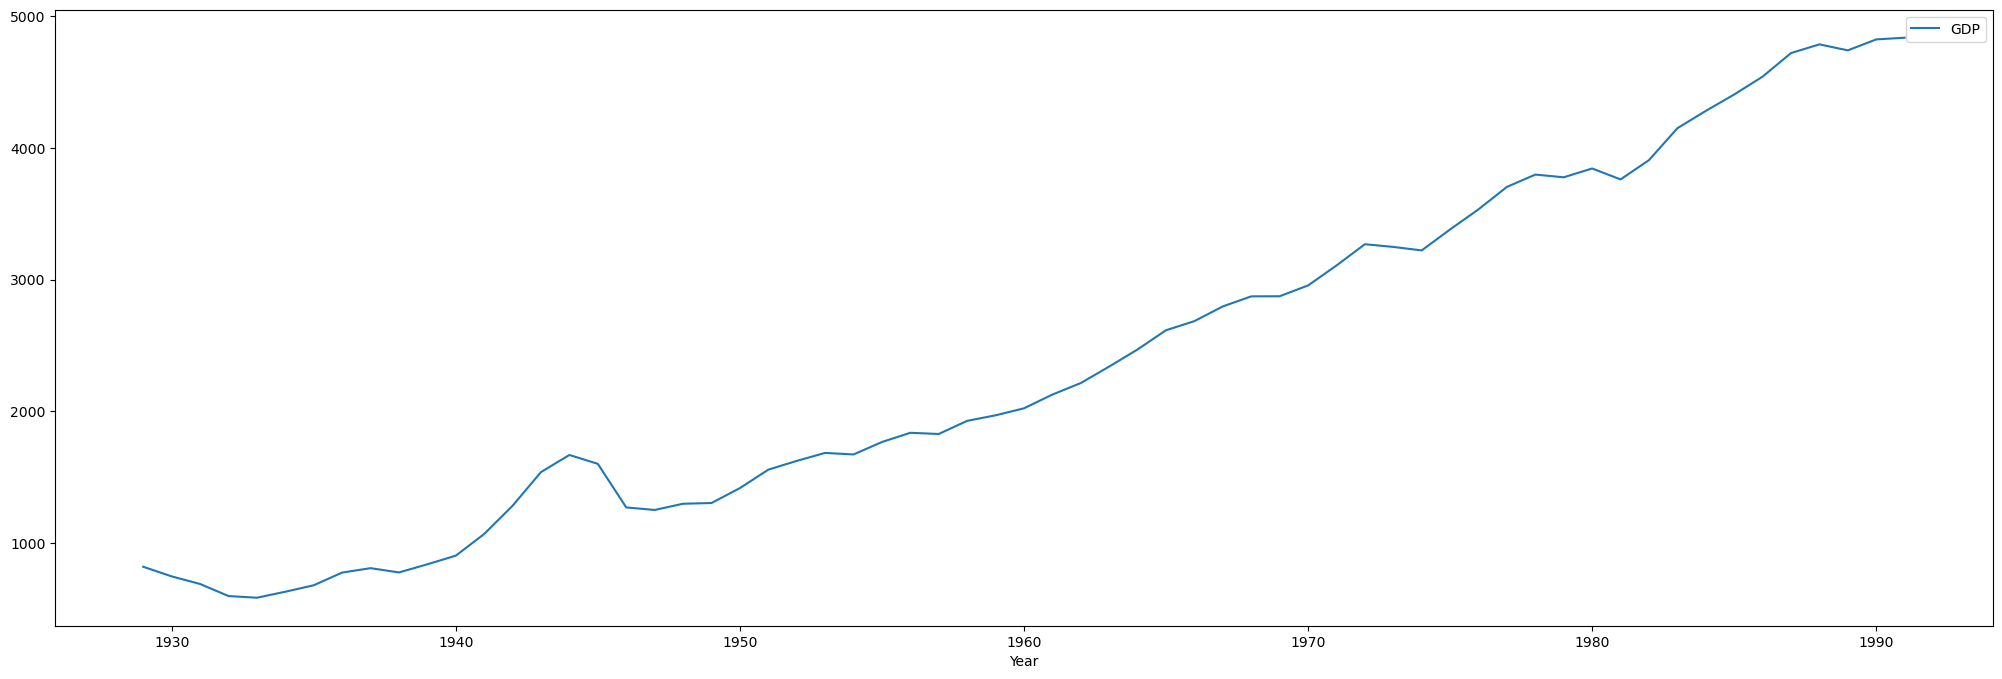

In [30]:
df1=df1.set_index('Year')
df1.plot()

In [31]:
acf(df1,nlags=20)

array([1.        , 0.95767063, 0.90994842, 0.86070238, 0.8073258 ,
       0.75396626, 0.70349868, 0.65473443, 0.60719985, 0.55974926,
       0.51531969, 0.47320066, 0.42813631, 0.38489791, 0.34223893,
       0.30302088, 0.26699204, 0.23121882, 0.19266056, 0.15197129,
       0.10971482])

In [32]:
pacf(df1,nlags=20)

array([ 1.        ,  0.97311693, -0.13524322, -0.05484616, -0.1172637 ,
       -0.02595638,  0.01941432, -0.01192295, -0.02685853, -0.05968479,
        0.01653998, -0.00572247, -0.12669064, -0.00600269, -0.05571448,
        0.04693534,  0.00921626, -0.07398195, -0.15696142, -0.13087817,
       -0.09784509])

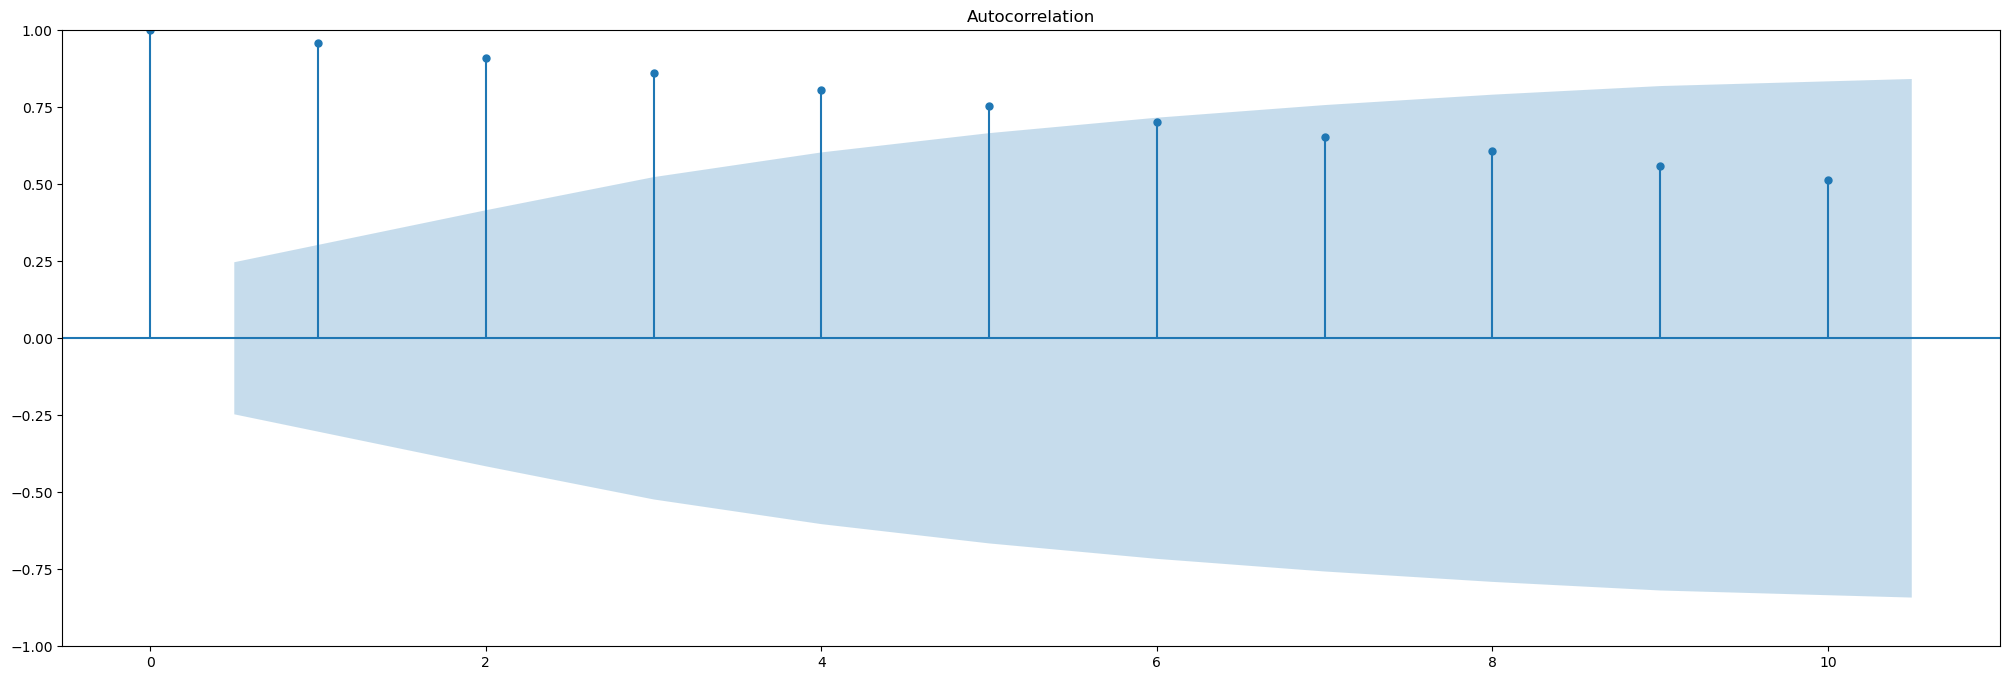

In [33]:
plot_acf(df1,lags=10);

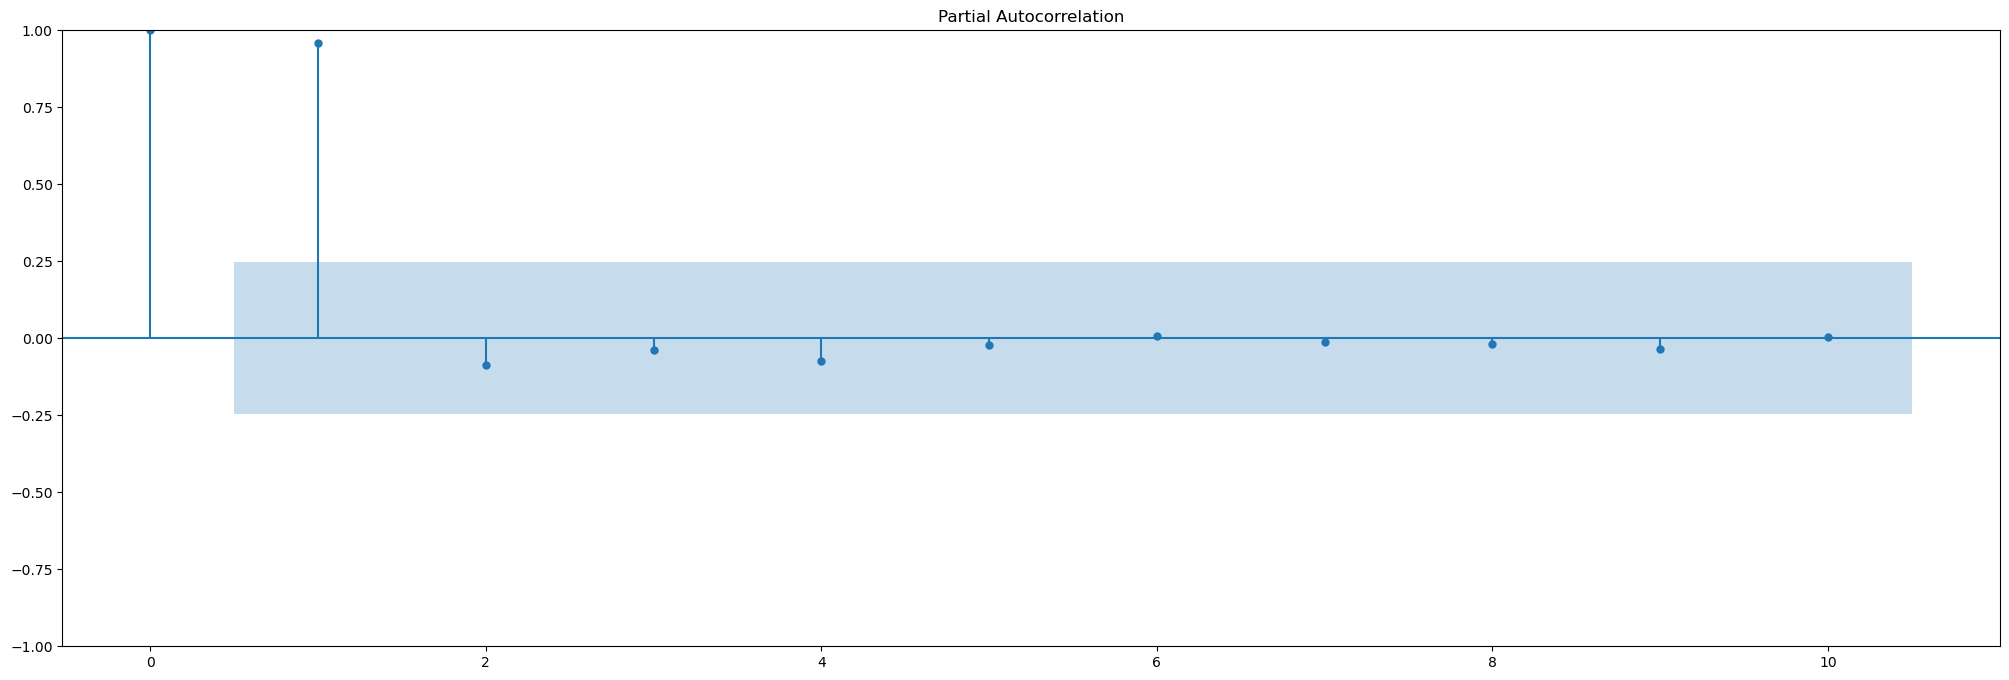

In [34]:
plot_pacf(df1,lags=10);

### ACF and PACF for seasonal data

In [36]:
df2= pd.read_csv(LOCAL_DATA_PATH+'AirTemp.csv')
df2.head()

,Year,Month,AvgTemp
0,1920,Jan,40.6
1,1920,Feb,40.8
2,1920,Mar,44.4
3,1920,Apr,46.7
4,1920,May,54.1


In [37]:
df2.tail()

,Year,Month,AvgTemp
235,1939,Aug,61.8
236,1939,Sep,58.2
237,1939,Oct,46.7
238,1939,Nov,46.6
239,1939,Dec,37.8


In [38]:
date=pd.date_range(start='01/01/1920',end='31/12/1939',freq='M')

In [39]:
df2['Month']=date
df2=df2.drop('Year',axis=1)
df2=df2.set_index('Month')

<Axes: xlabel='Month'>

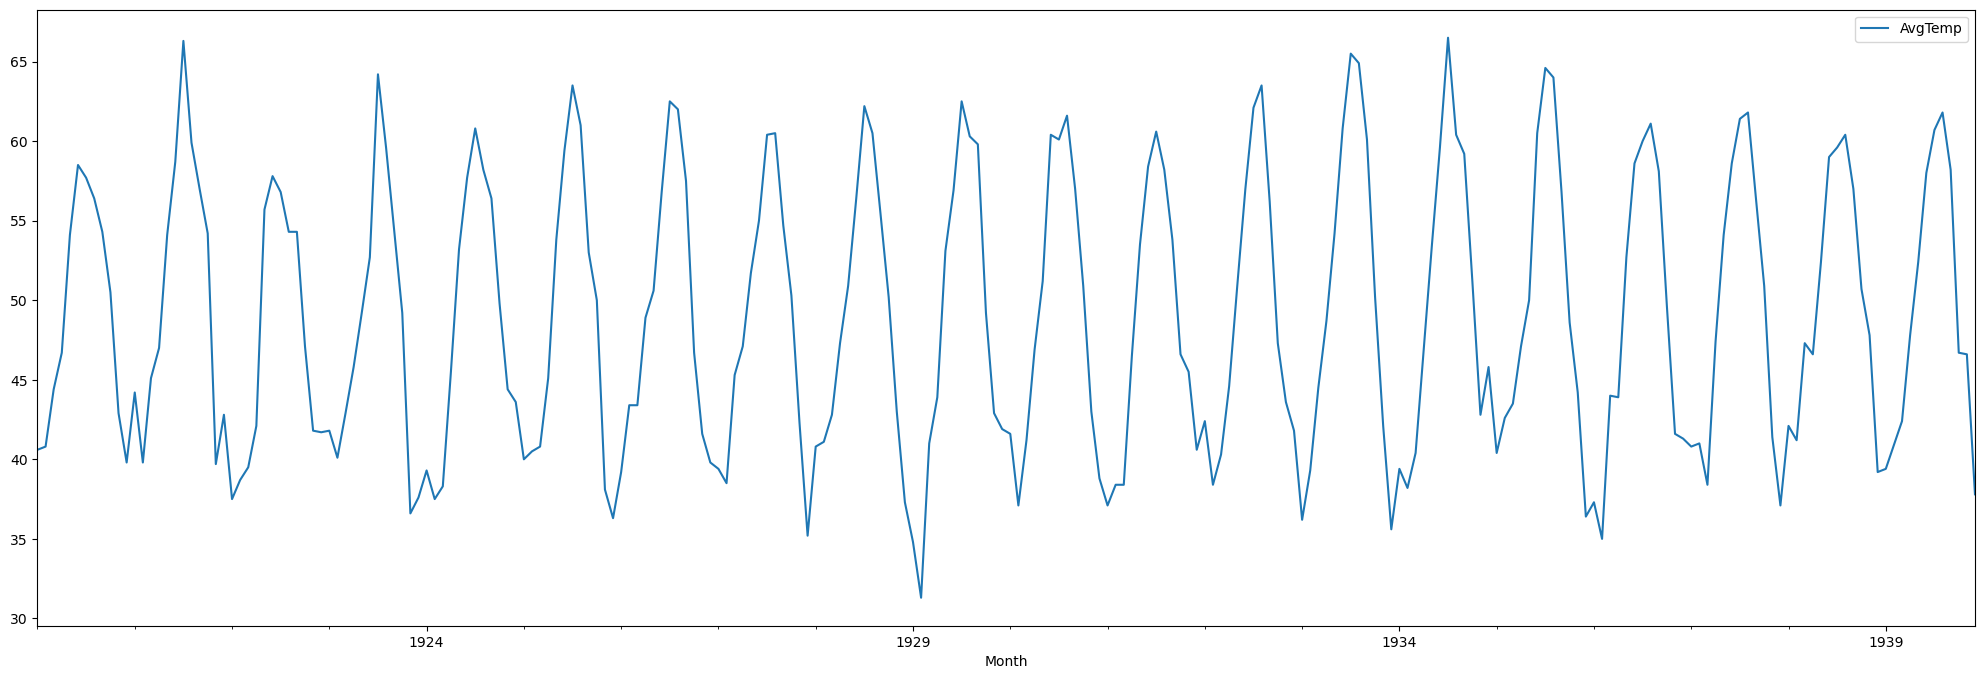

In [40]:
df2.plot()

In [41]:
acf(df2)

array([ 1.        ,  0.80790526,  0.45248675, -0.01751263, -0.46420604,
       -0.76994762, -0.87586799, -0.75631615, -0.44503049, -0.01012765,
        0.4287941 ,  0.76499405,  0.88418607,  0.76992388,  0.43521273,
       -0.01110211, -0.44055642, -0.73441497, -0.84416434, -0.72553741,
       -0.43139643, -0.01523368,  0.41976175,  0.73227741])

In [42]:
pacf(df2)

array([ 1.        ,  0.81128562, -0.59065522, -0.57230108, -0.38994045,
       -0.23943022, -0.28545341, -0.27998011, -0.21257999,  0.0131737 ,
        0.14094934,  0.31502474,  0.21896989,  0.25542659,  0.05184143,
       -0.06315817, -0.08001226,  0.03759164, -0.18472002, -0.12794006,
       -0.23702625, -0.06083874,  0.22273062,  0.22081597])

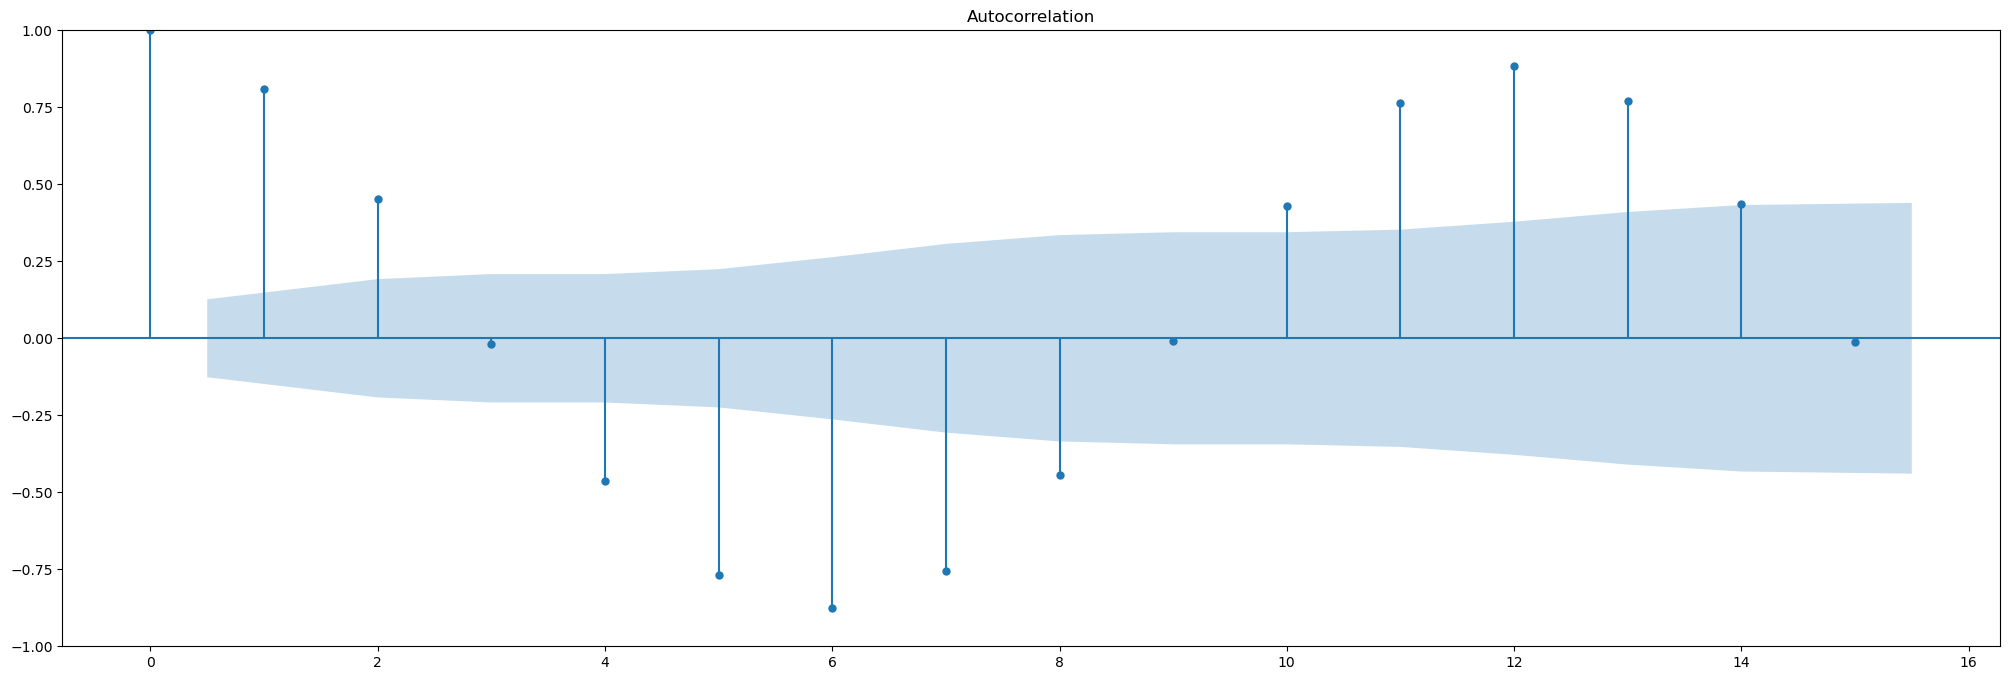

In [43]:
plot_acf(df2,lags=15);

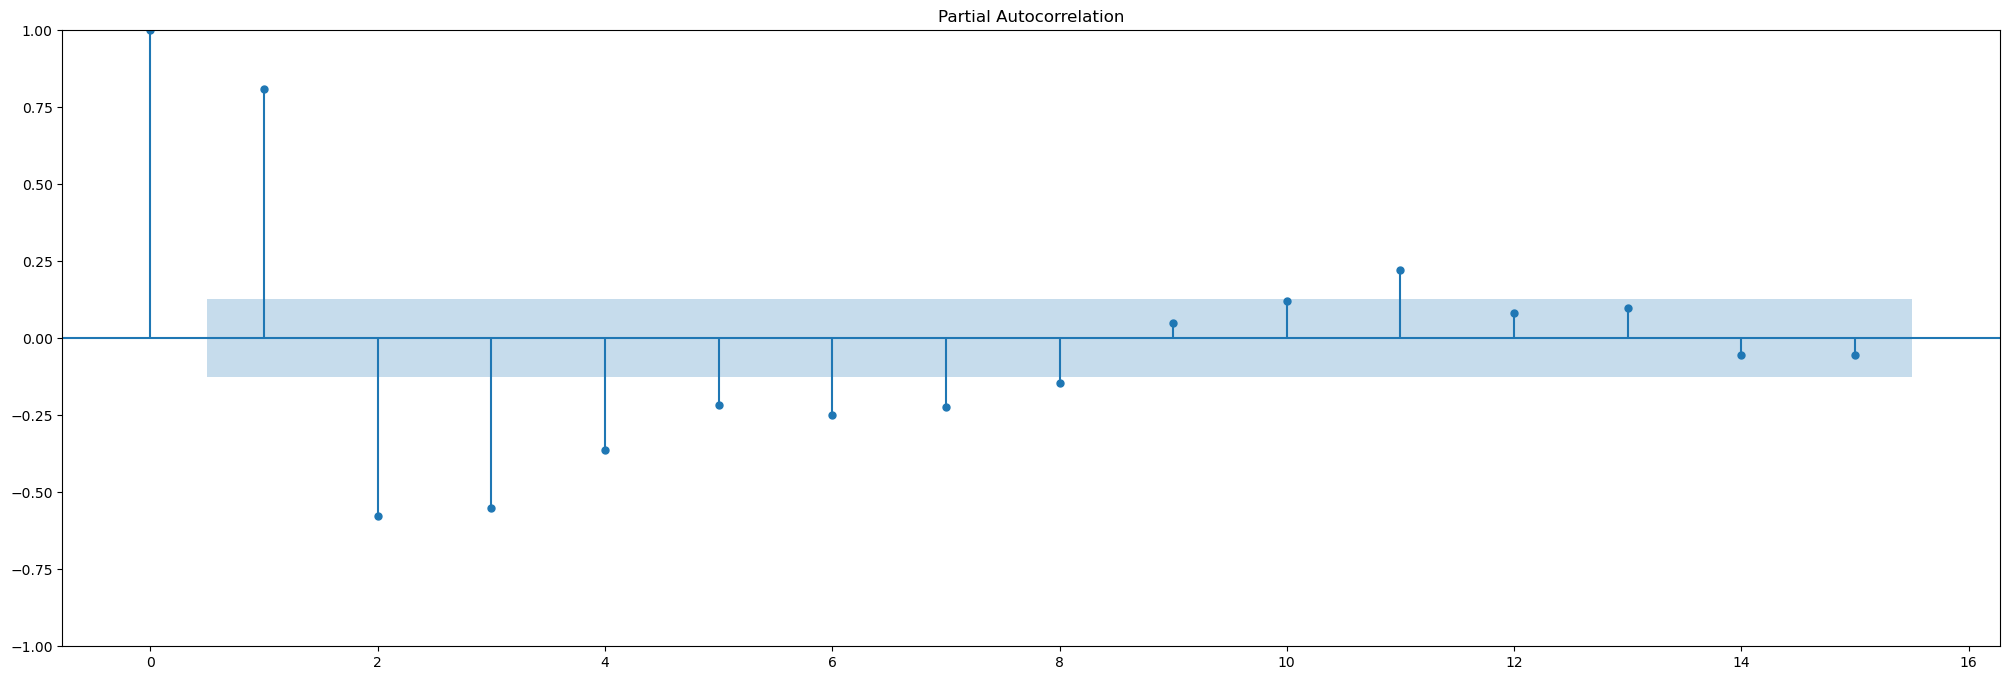

In [44]:
plot_pacf(df2,lags=15);

### ACF and PACF for series with trend and seasonality

In [45]:
df3=pd.read_csv(LOCAL_DATA_PATH+'champagne.csv')
df3.head()

,Month,Sales
0,1964-01,2815
1,1964-02,2672
2,1964-03,2755
3,1964-04,2721
4,1964-05,2946


In [46]:
df3.tail()

,Month,Sales
100,1972-05,4618
101,1972-06,5312
102,1972-07,4298
103,1972-08,1413
104,1972-09,5877


In [47]:
date=pd.date_range(start='01/01/1964',end='30/9/1972',freq='M')

In [48]:
df3['Month']=date
df3=df3.set_index('Month')

<Axes: xlabel='Month'>

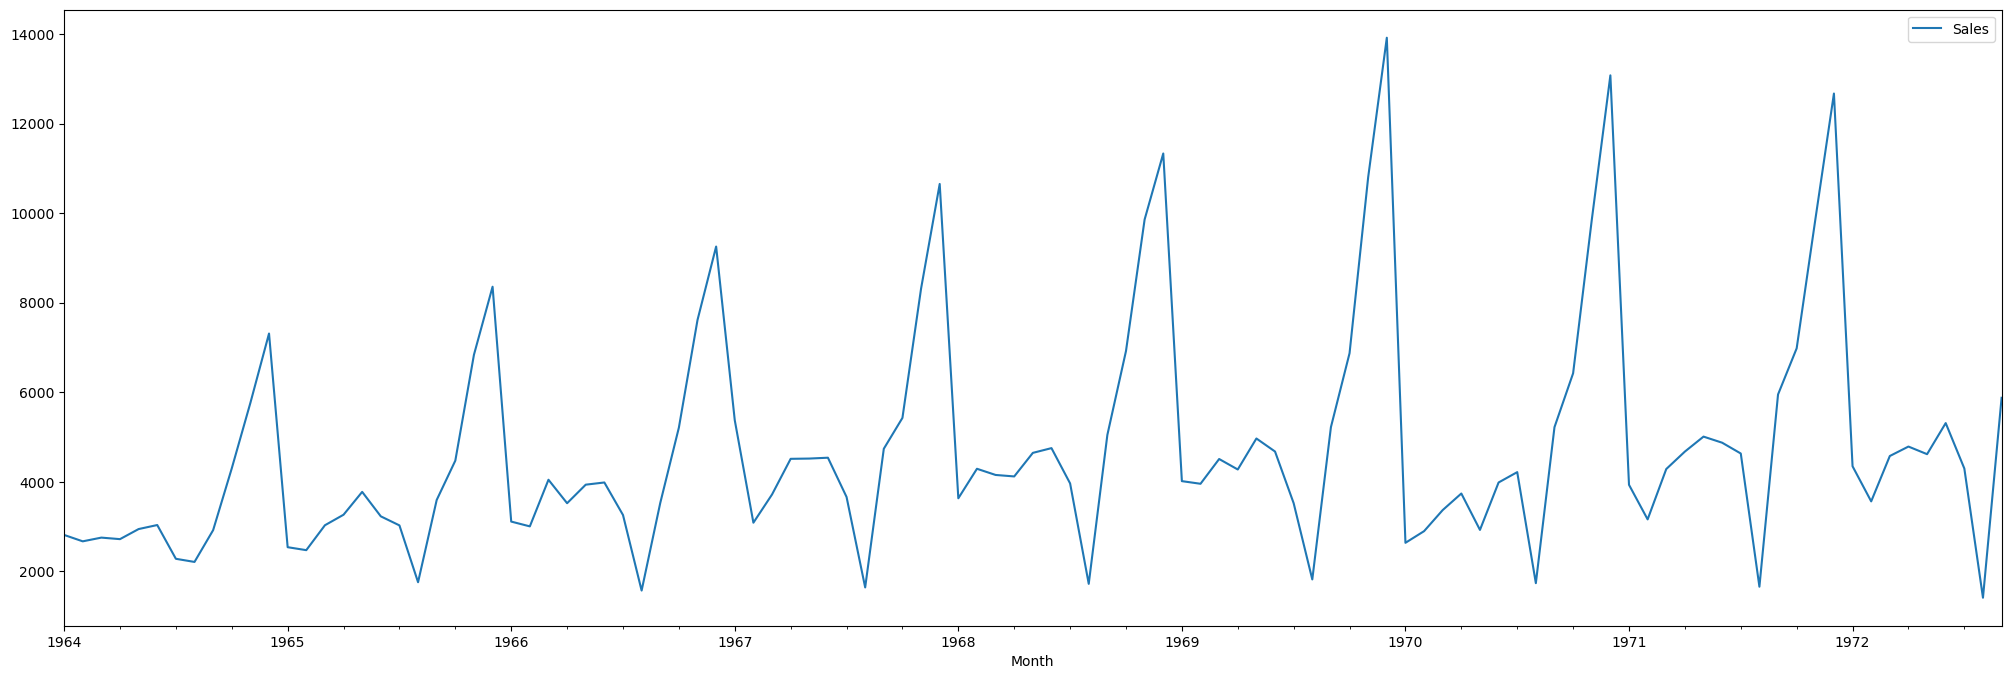

In [49]:
df3.plot()

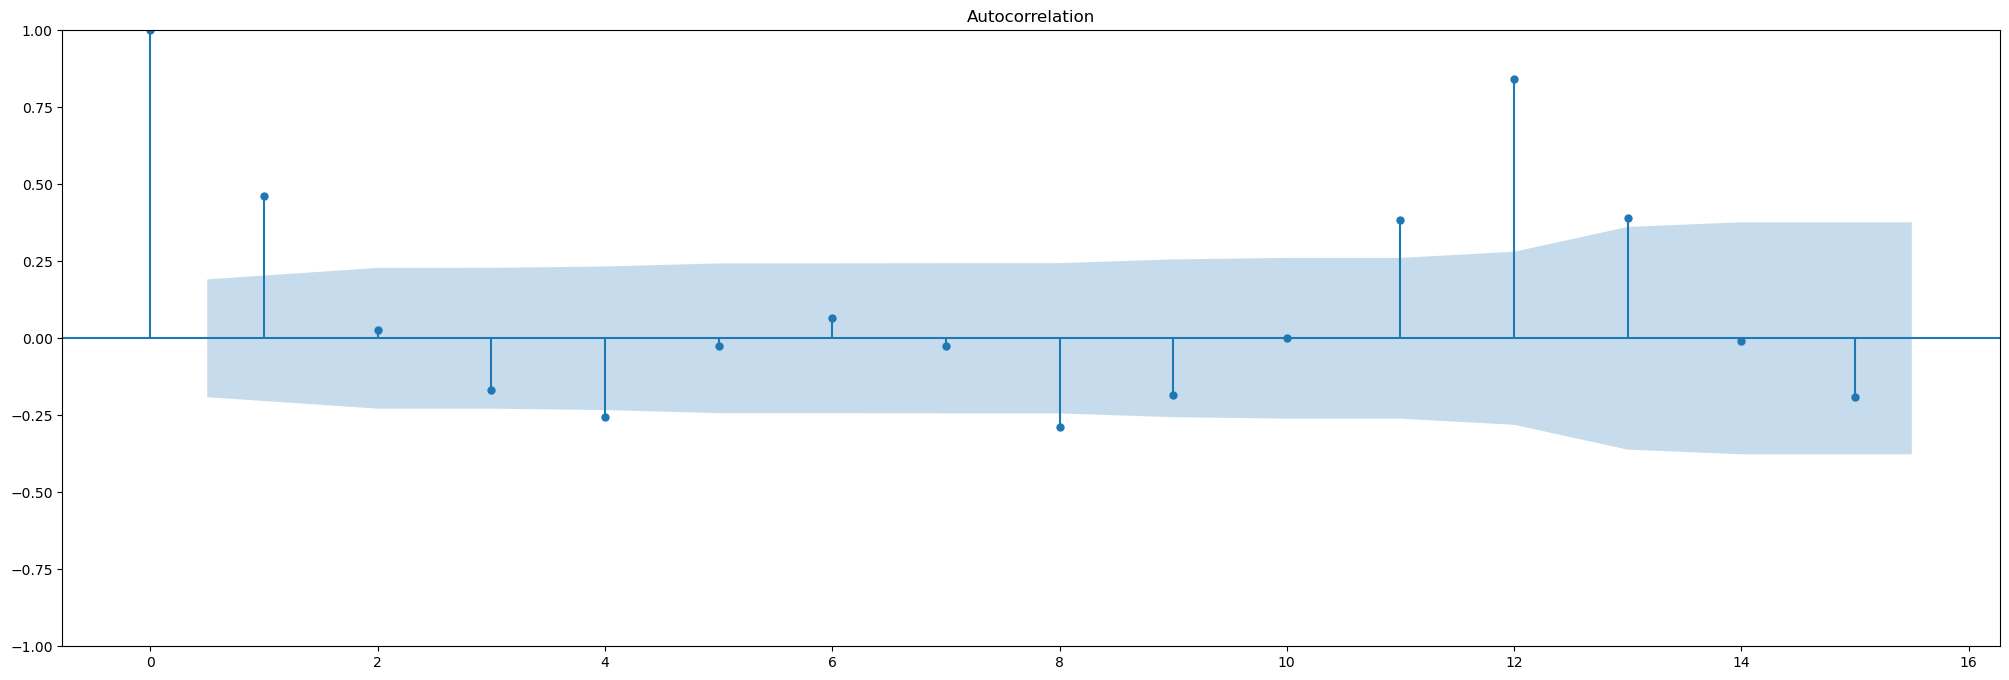

In [50]:
plot_acf(df3,lags=15);

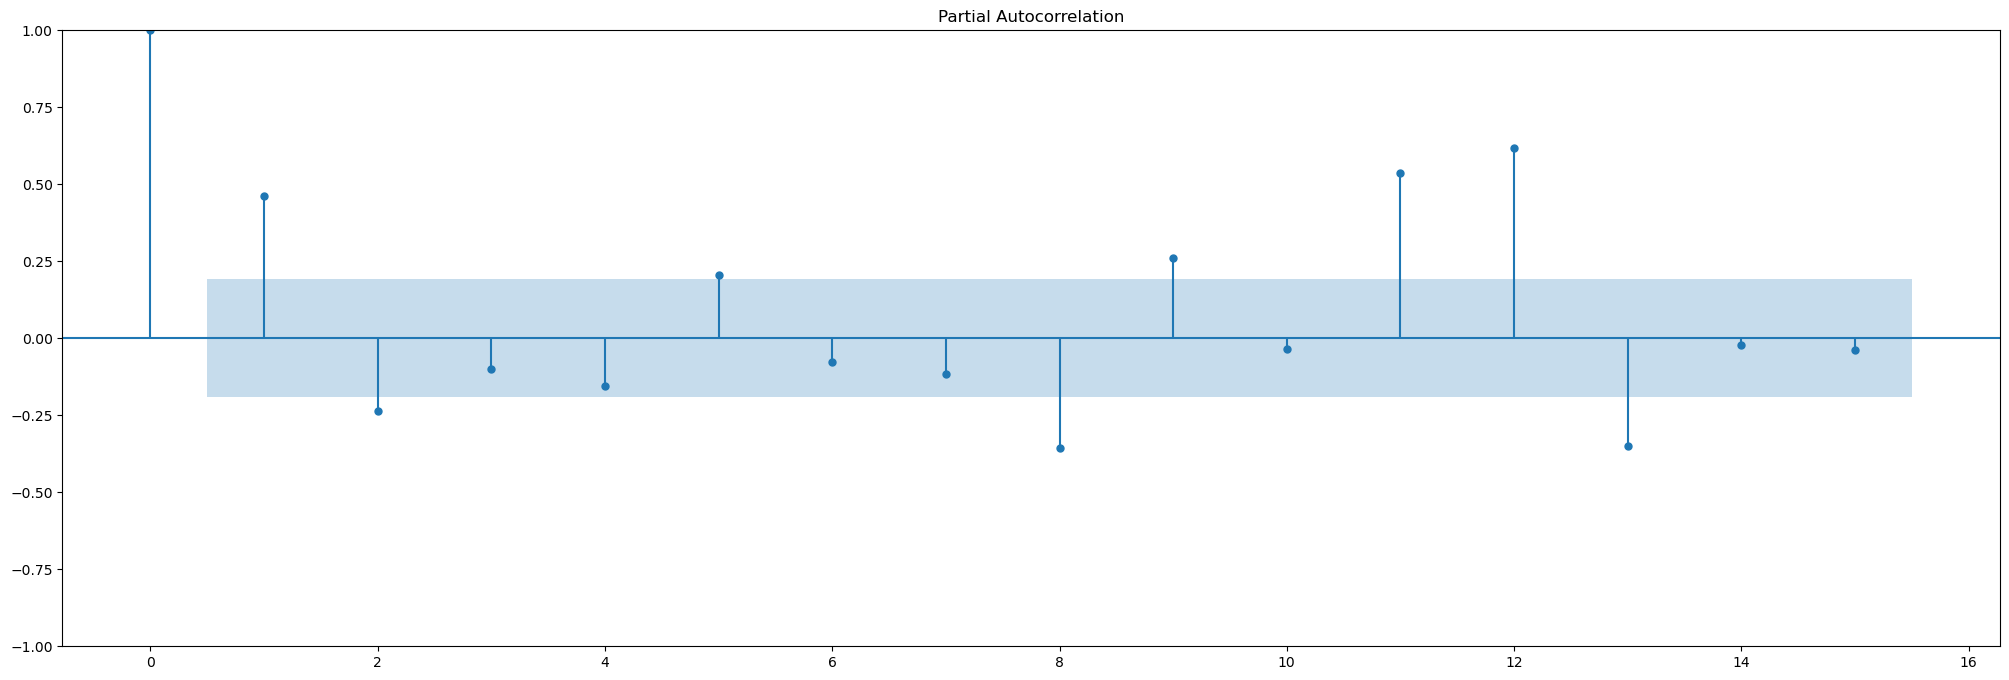

In [51]:
plot_pacf(df3,lags=15);

### ACF and PACF for series with trend and multiplicative seasonality

In [52]:
df4 = pd.read_csv(LOCAL_DATA_PATH+'AirPassenger.csv',parse_dates=True,index_col = 'Year-Month')
df4.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Year-Month'>

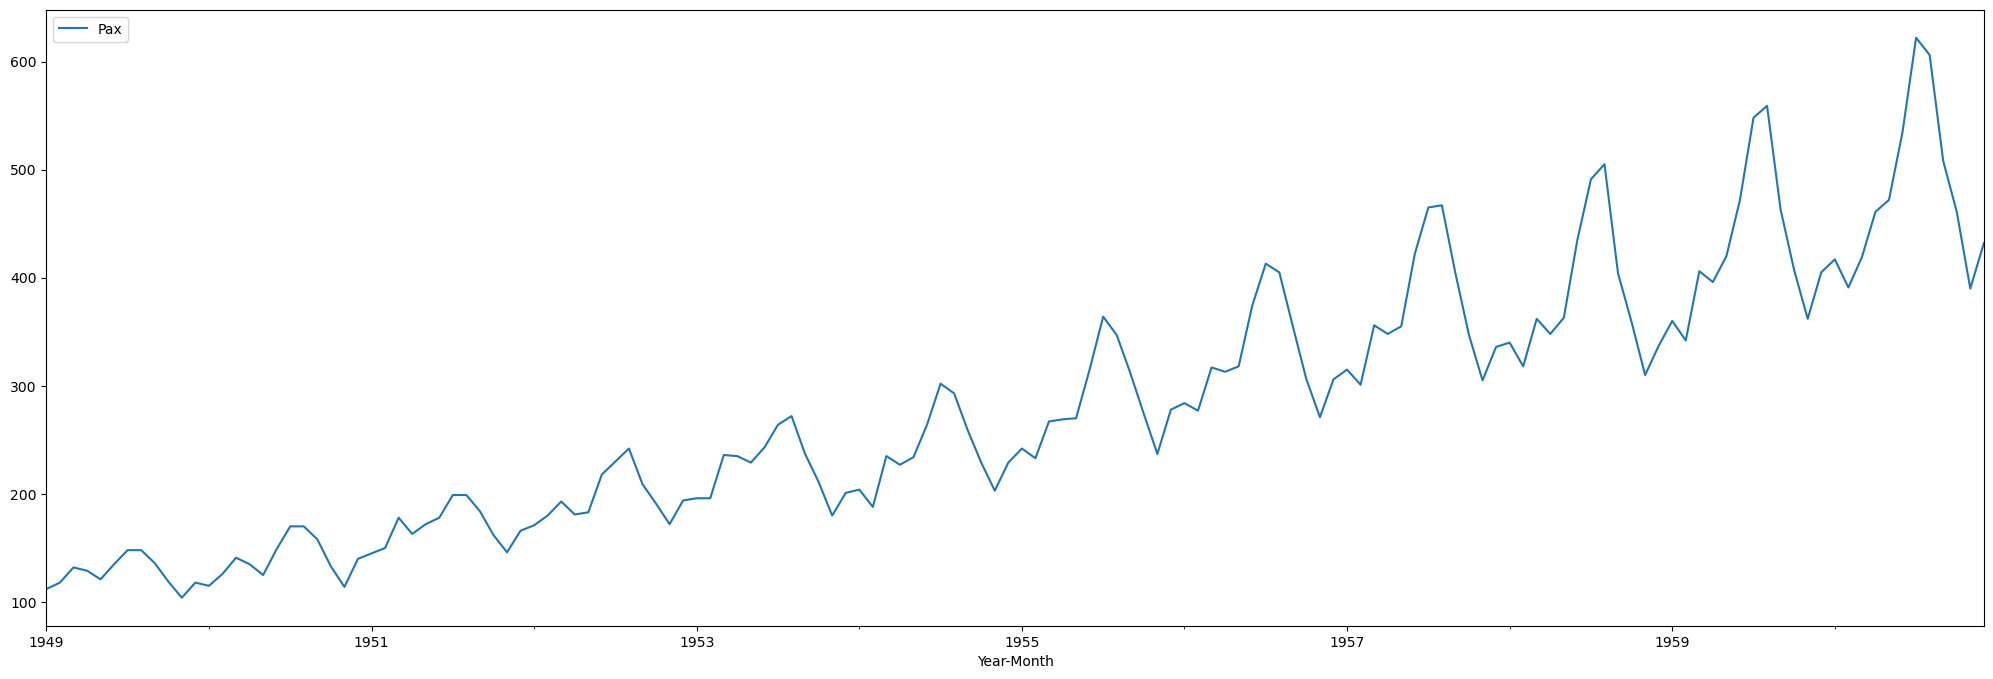

In [53]:
df4.plot()

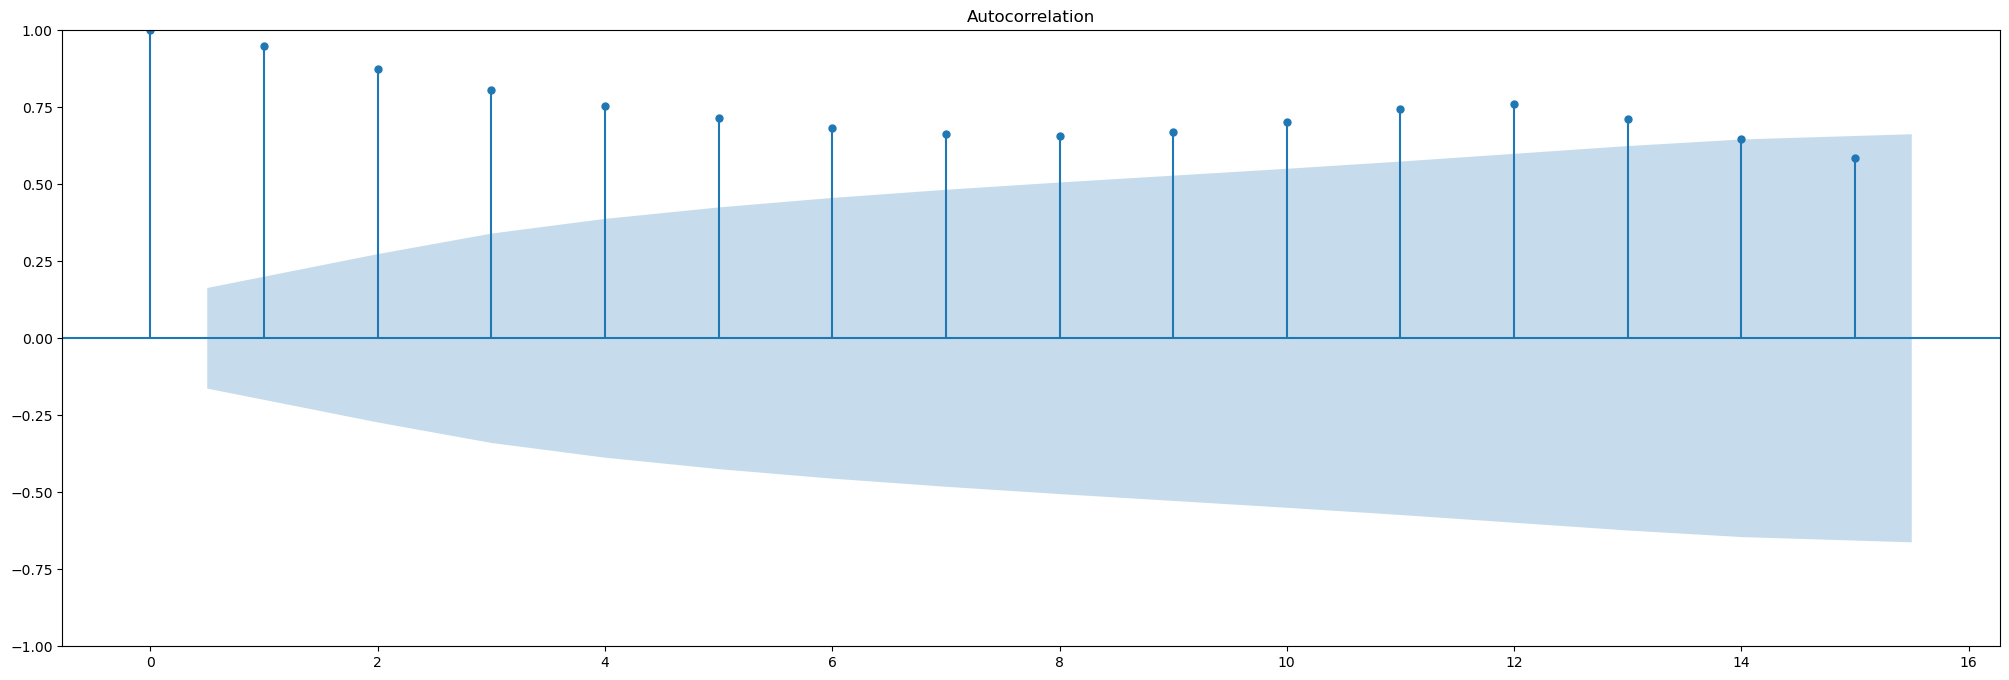

In [54]:
plot_acf(df4,lags=15);

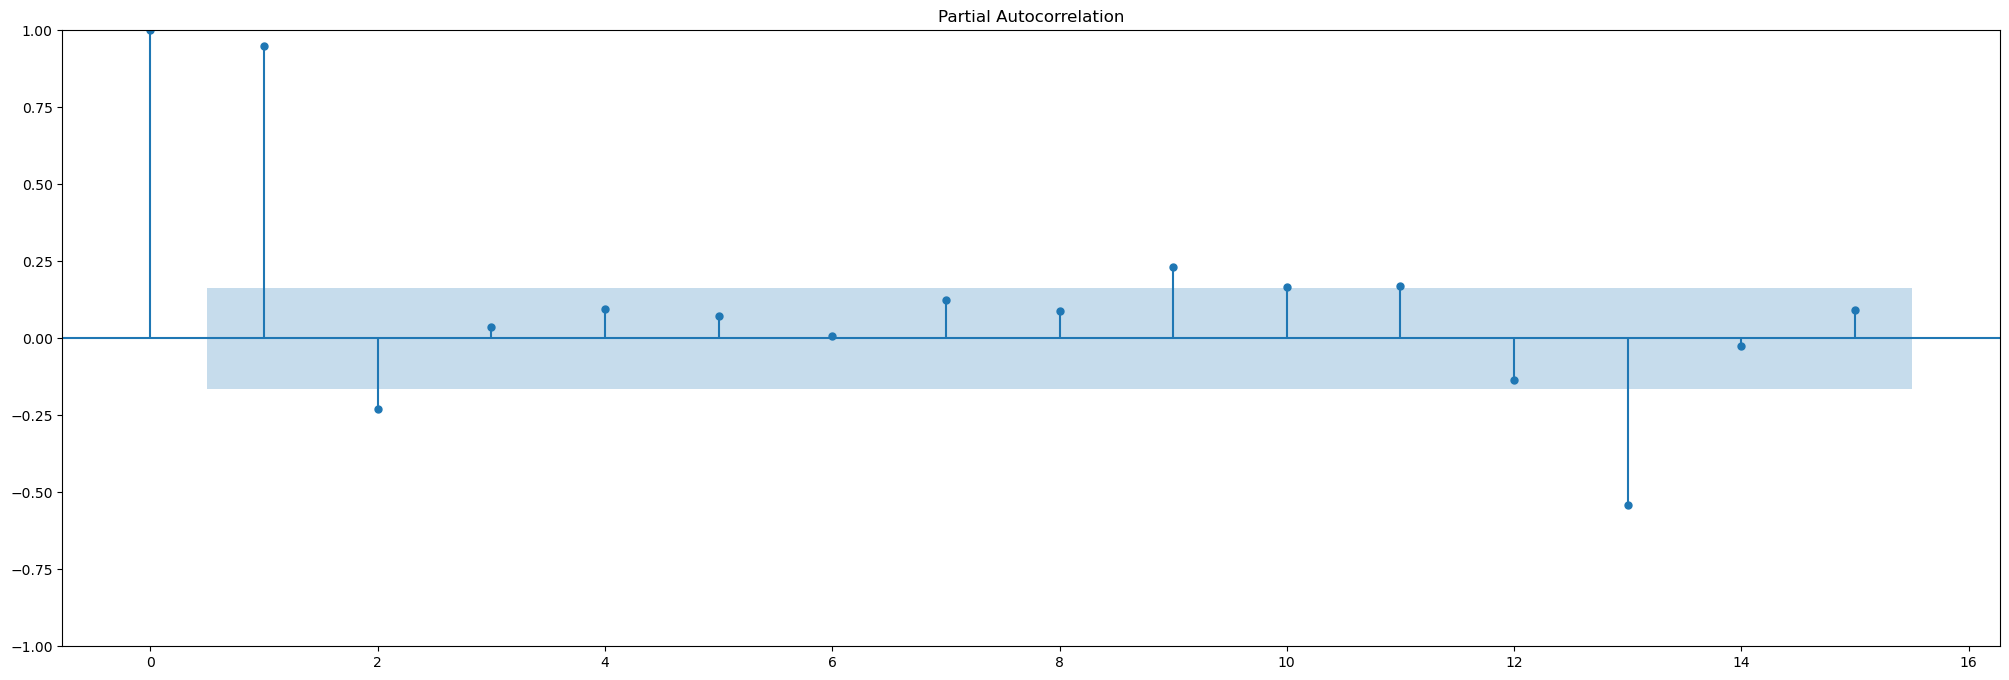

In [55]:
plot_pacf(df4,lags=15);

## Differencing

## 1st order Differencing

In [56]:
df_1=df.diff().dropna()

<Axes: title={'center': '1st oder differencing'}, xlabel='Month'>

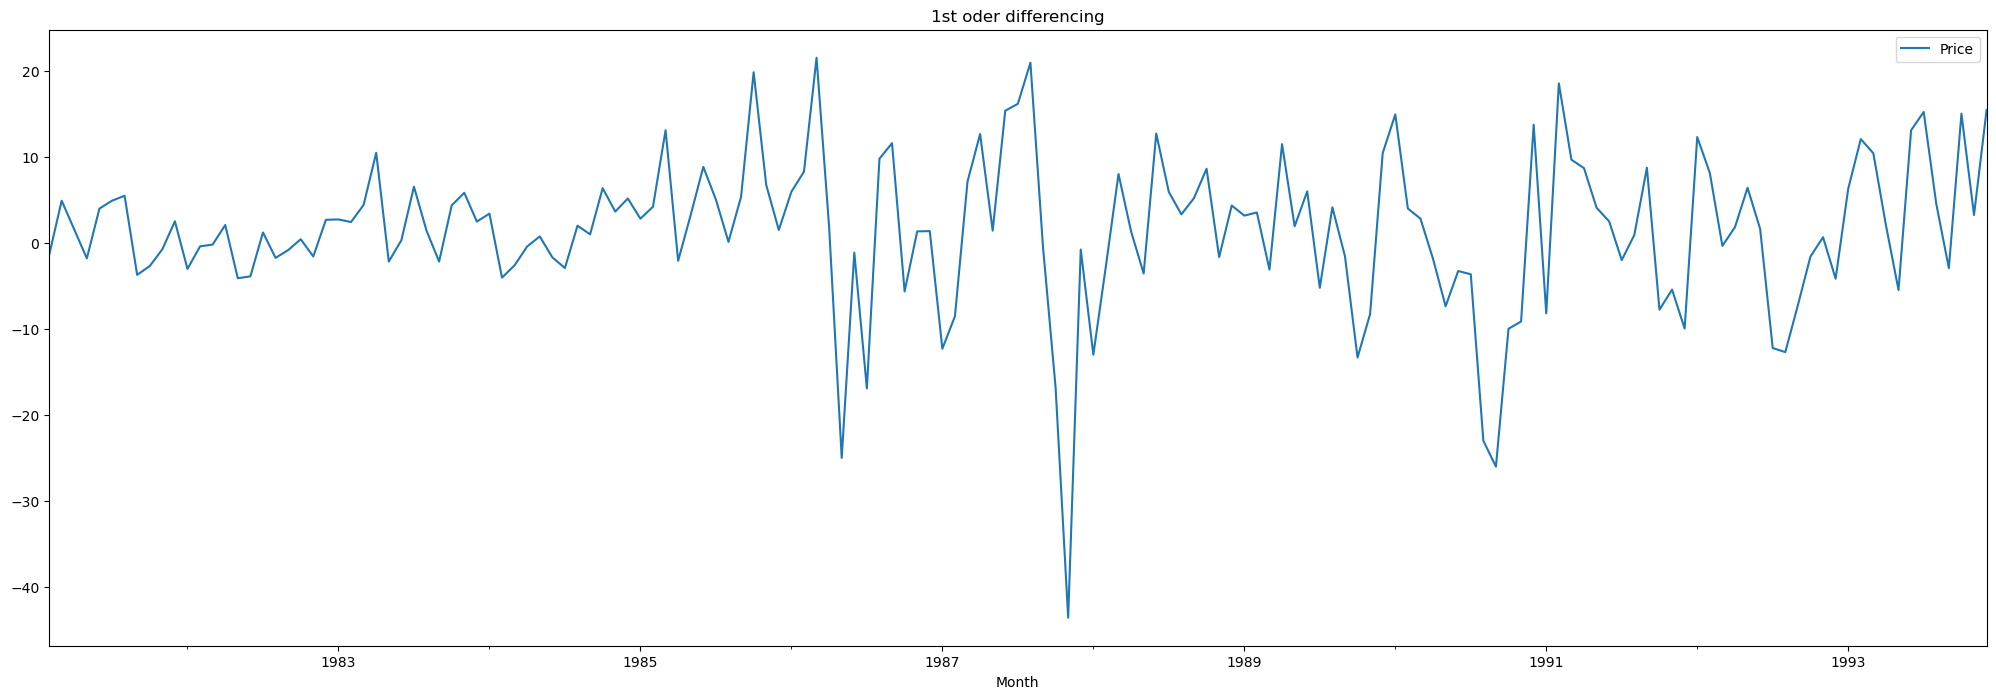

In [57]:
df_1.plot(title='1st oder differencing')

## Seasonal differencing

<Axes: xlabel='Month'>

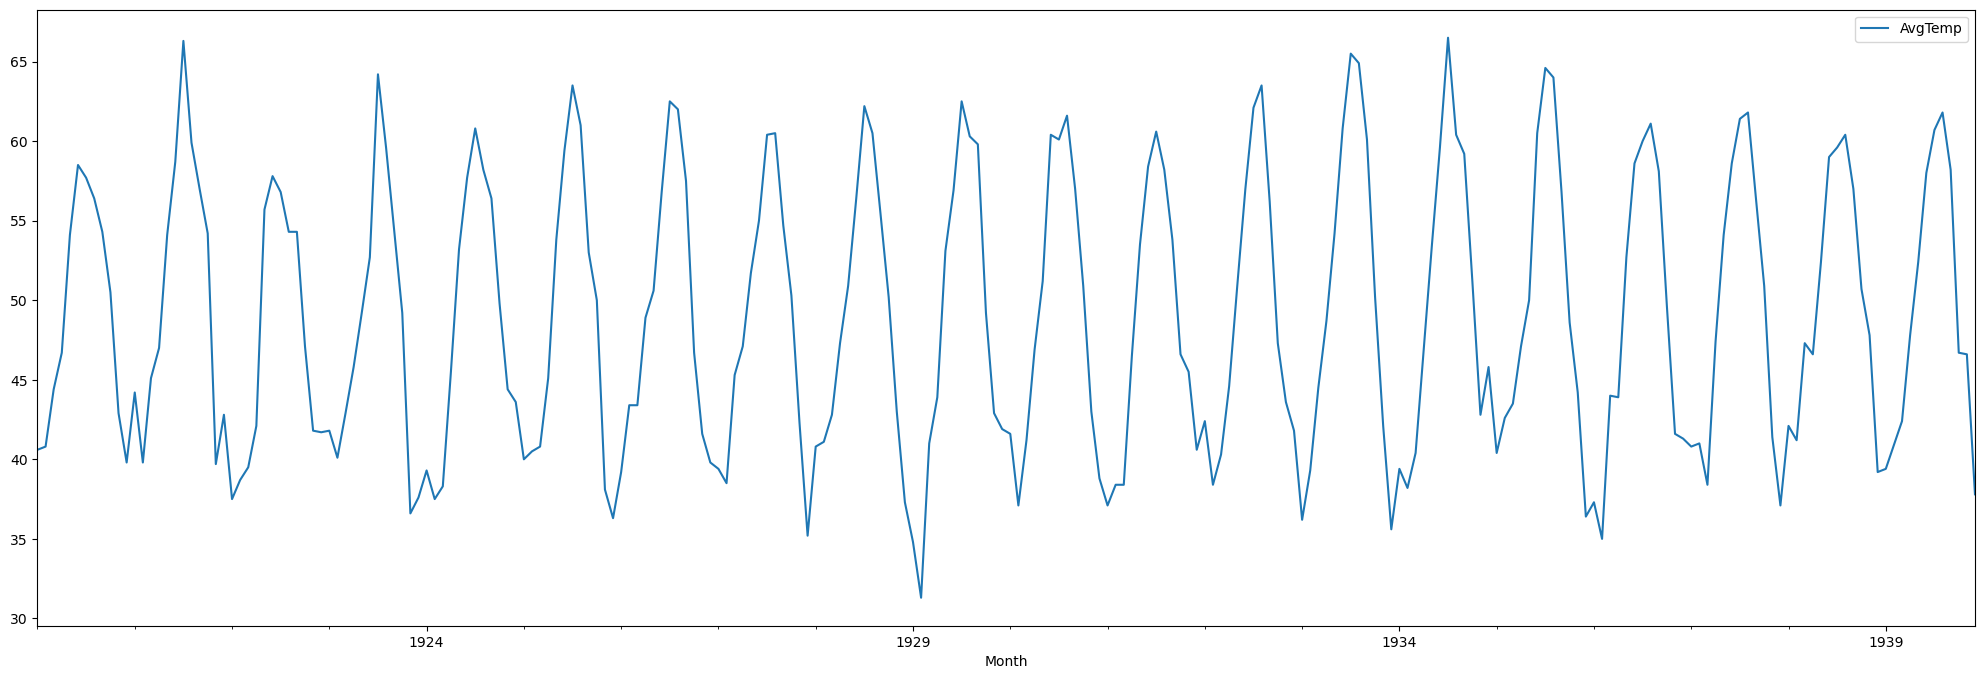

In [58]:
df2.plot()

In [59]:
df2_12=df2.diff(periods=12).dropna()

<Axes: xlabel='Month'>

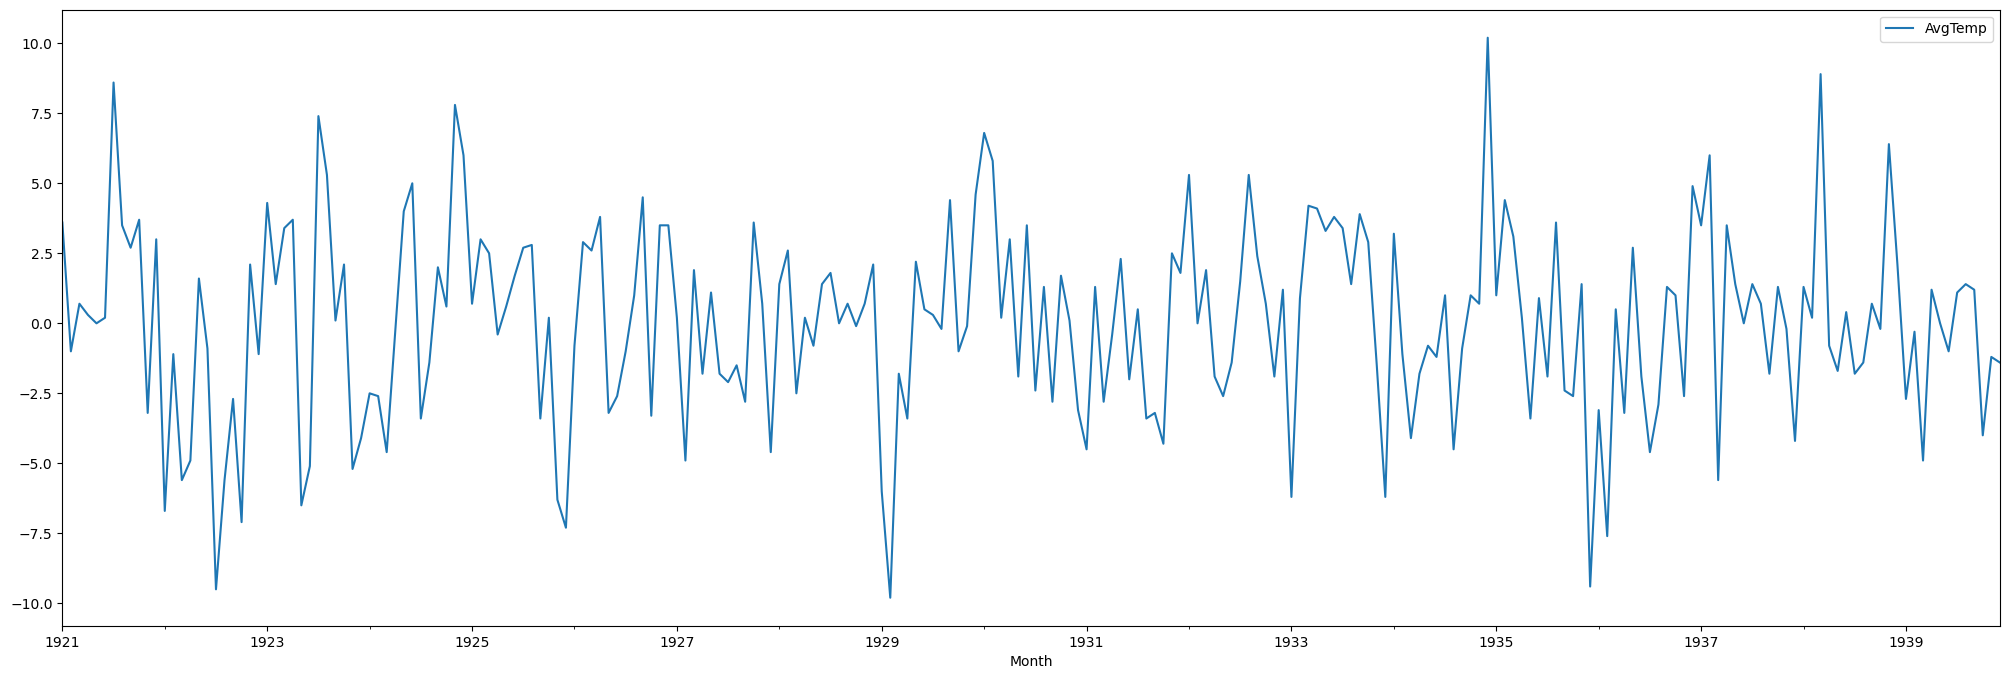

In [60]:
df2_12.plot()

<Axes: xlabel='Year-Month'>

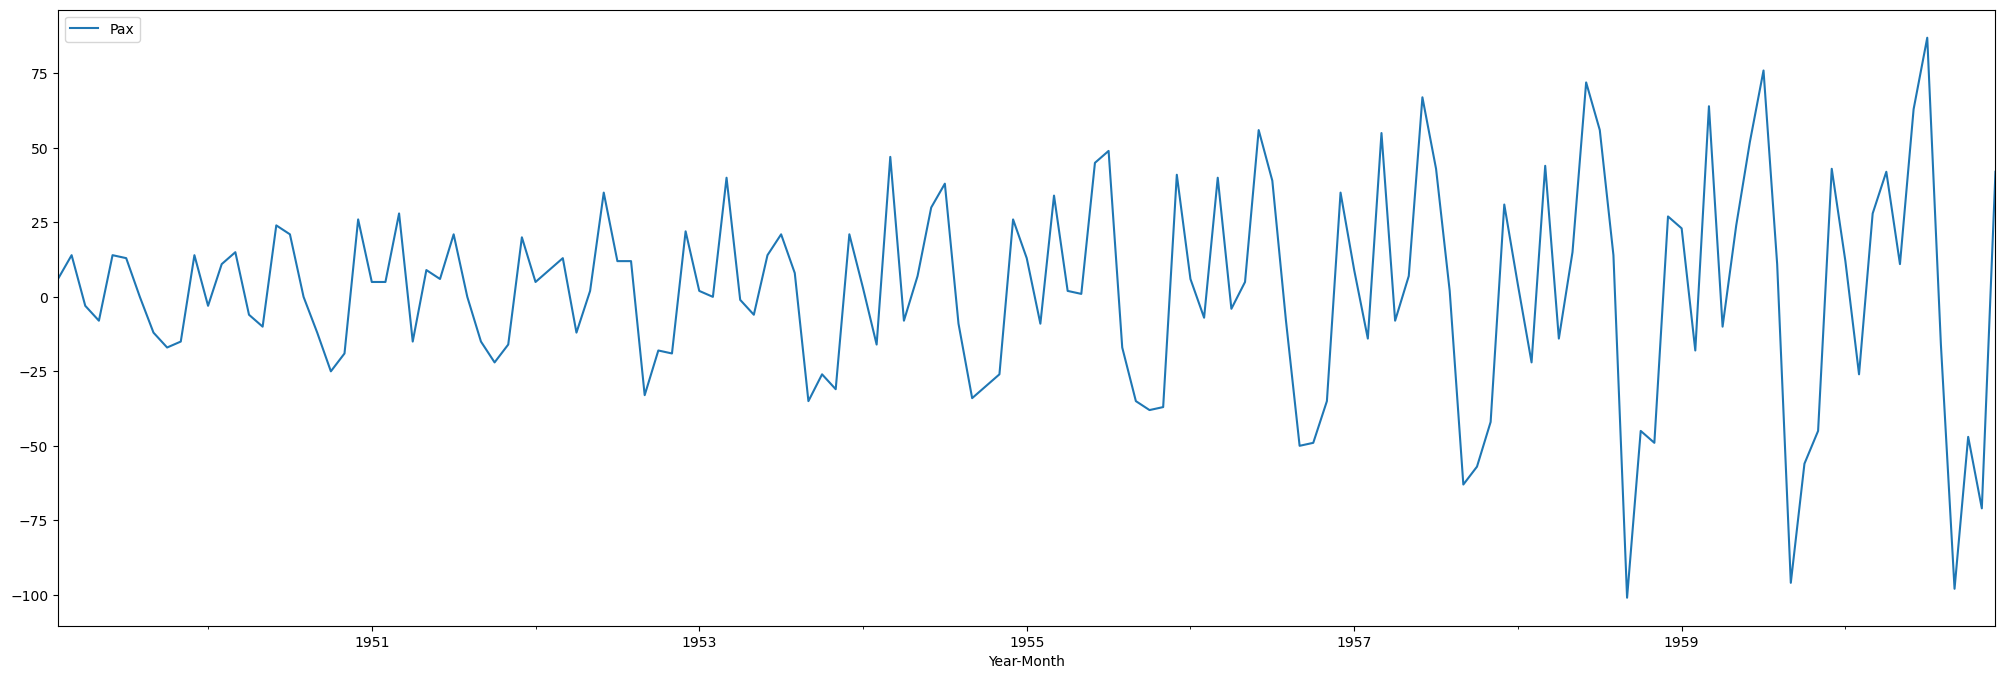

In [61]:
df4_1=df4.diff(periods=1).dropna()
df4_1.plot()

<Axes: xlabel='Year-Month'>

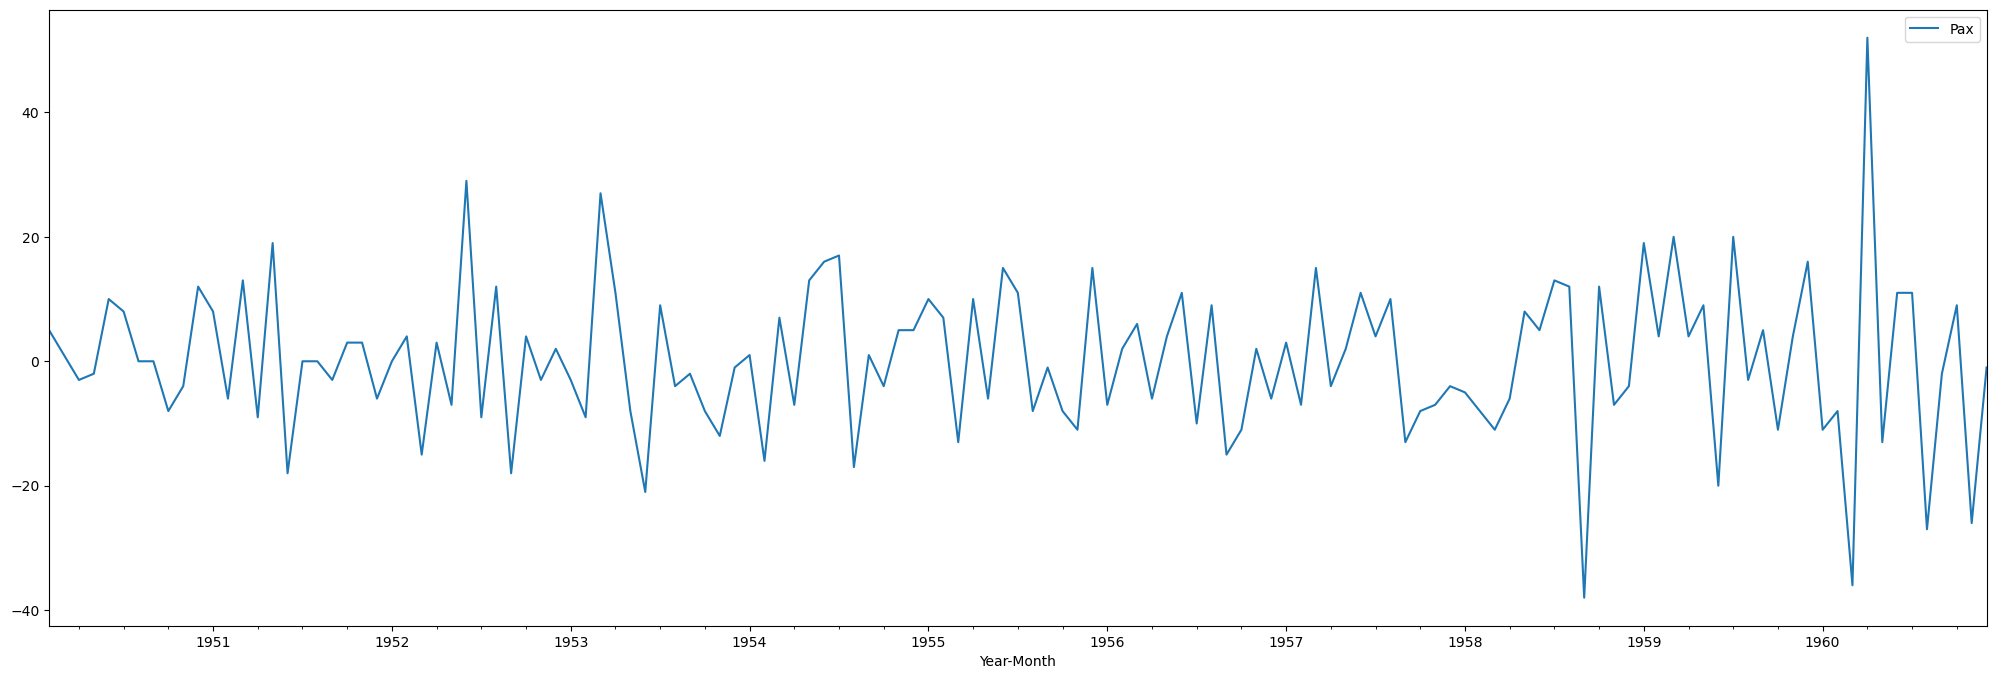

In [62]:
df4_12=df4_1.diff(periods=12).dropna()
df4_12.plot()